In [9]:
# Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from statsmodels.stats import diagnostic
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [10]:
data_folder = './MovieSummaries/MovieSummaries/'
#paths to files
plot_summaries_path = data_folder + 'plot_summaries.txt'
movie_metadata_path = data_folder + 'movie.metadata.tsv'
character_metadata_path = data_folder + 'character.metadata.tsv'

# load the data
# 1. Plot summaries data
plot_summaries_df = pd.read_csv(plot_summaries_path, delimiter='\t', names=['wikipedia_movie_id', 'plot_summary'], 
                                 encoding='utf-8')

# 2. Movie metadata
movie_metadata_df = pd.read_csv(movie_metadata_path, delimiter='\t', names=['wikipedia_movie_id', 'freebase_movie_id', 
                                                                            'movie_name', 'release_date', 'box_office_revenue',
                                                                            'runtime', 'languages', 'countries', 'genres'], 
                                 encoding='utf-8')

# 3. Character metadata
character_metadata_df = pd.read_csv(character_metadata_path, delimiter='\t', names=['wikipedia_movie_id', 'freebase_movie_id', 'release_date', 'character_name', 
                                                                                    'actor_dob', 'actor_gender', 'actor_height', 'actor_ethnicity', 'actor_name', 
                                                                                    'actor_age_at_release', 'freebase_character_actor_map_id', 'freebase_character_id', 
                                                                                    'freebase_actor_id'], 
                                     encoding='utf-8')


In [11]:
print("Size of plot_summaries_df :", plot_summaries_df.shape)
print("Size of movie_metadata_df :", movie_metadata_df.shape)
print("Size of character_metadata_df :", character_metadata_df.shape)


Size of plot_summaries_df : (42303, 2)
Size of movie_metadata_df : (81741, 9)
Size of character_metadata_df : (450669, 13)


In [12]:

# first few rows of each dataframe to understand
print("Plot Summaries DataFrame:")
print(plot_summaries_df.head(), "\n")

print("Movie Metadata DataFrame:")
print(movie_metadata_df.head(), "\n")

print("Character Metadata DataFrame:")
print(character_metadata_df.head(), "\n")



Plot Summaries DataFrame:
   wikipedia_movie_id                                       plot_summary
0            23890098  Shlykov, a hard-working taxi driver and Lyosha...
1            31186339  The nation of Panem consists of a wealthy Capi...
2            20663735  Poovalli Induchoodan  is sentenced for six yea...
3             2231378  The Lemon Drop Kid , a New York City swindler,...
4              595909  Seventh-day Adventist Church pastor Michael Ch... 

Movie Metadata DataFrame:
   wikipedia_movie_id freebase_movie_id  \
0              975900         /m/03vyhn   
1             3196793         /m/08yl5d   
2            28463795        /m/0crgdbh   
3             9363483        /m/0285_cd   
4              261236         /m/01mrr1   

                                          movie_name release_date  \
0                                     Ghosts of Mars   2001-08-24   
1  Getting Away with Murder: The JonBenét Ramsey ...   2000-02-16   
2                                        B

In [13]:
headers = movie_metadata_df.columns.tolist()

print("Headers of the movie_metadata_df:")
print(headers)
headers = plot_summaries_df.columns.tolist()

print("Headers of the plot_summaries_df:")
print(headers)
headers = character_metadata_df.columns.tolist()

print("Headers of the character_metadata_df:")
print(headers)

Headers of the movie_metadata_df:
['wikipedia_movie_id', 'freebase_movie_id', 'movie_name', 'release_date', 'box_office_revenue', 'runtime', 'languages', 'countries', 'genres']
Headers of the plot_summaries_df:
['wikipedia_movie_id', 'plot_summary']
Headers of the character_metadata_df:
['wikipedia_movie_id', 'freebase_movie_id', 'release_date', 'character_name', 'actor_dob', 'actor_gender', 'actor_height', 'actor_ethnicity', 'actor_name', 'actor_age_at_release', 'freebase_character_actor_map_id', 'freebase_character_id', 'freebase_actor_id']


In [14]:

# missing values
print("Missing values in Plot Summaries DataFrame:")
print(plot_summaries_df.isnull().mean(), "\n")

print("Missing values in Movie Metadata DataFrame:")
print(movie_metadata_df.isnull().mean(), "\n")

print("Missing values in Character Metadata DataFrame:")
print(character_metadata_df.isnull().mean(), "\n")
#

Missing values in Plot Summaries DataFrame:
wikipedia_movie_id    0.0
plot_summary          0.0
dtype: float64 

Missing values in Movie Metadata DataFrame:
wikipedia_movie_id    0.000000
freebase_movie_id     0.000000
movie_name            0.000000
release_date          0.084437
box_office_revenue    0.897224
runtime               0.250180
languages             0.000000
countries             0.000000
genres                0.000000
dtype: float64 

Missing values in Character Metadata DataFrame:
wikipedia_movie_id                 0.000000
freebase_movie_id                  0.000000
release_date                       0.022178
character_name                     0.572205
actor_dob                          0.235528
actor_gender                       0.101203
actor_height                       0.656457
actor_ethnicity                    0.764665
actor_name                         0.002725
actor_age_at_release               0.350841
freebase_character_actor_map_id    0.000000
freebase_charac

In [15]:
for df in [character_metadata_df, movie_metadata_df, plot_summaries_df]:
    df['wikipedia_movie_id'] = pd.to_numeric(df['wikipedia_movie_id'], errors='coerce').fillna(-1).astype(int)

# Change data types
plot_summaries_df['plot_summary'] = plot_summaries_df['plot_summary'].astype('string')  
movie_metadata_df['movie_name'] = movie_metadata_df['movie_name'].astype('string')  
character_metadata_df['actor_name'] = character_metadata_df['actor_name'].astype('string')  
character_metadata_df['character_name'] = character_metadata_df['character_name'].astype('string')  
character_metadata_df['actor_gender'] = character_metadata_df['actor_gender'].astype('string')  
movie_metadata_df['freebase_movie_id'] = movie_metadata_df['freebase_movie_id'].astype('string')  
character_metadata_df['freebase_character_actor_map_id'] = character_metadata_df['freebase_character_actor_map_id'].astype('string')  
character_metadata_df['freebase_character_id'] = character_metadata_df['freebase_character_id'].astype('string')  
character_metadata_df['freebase_actor_id'] = character_metadata_df['freebase_actor_id'].astype('string')  

# Convert to float
character_metadata_df['actor_age_at_release'] = pd.to_numeric(character_metadata_df['actor_age_at_release'], errors='coerce')




print("Data types in character_metadata_df:")
print(character_metadata_df.dtypes)
print("\n Data types in movie_metadata_df:")
print(movie_metadata_df.dtypes)
print("\n Data types in plot_summaries_df:")
print(plot_summaries_df.dtypes)


Data types in character_metadata_df:
wikipedia_movie_id                   int64
freebase_movie_id                   object
release_date                        object
character_name                      string
actor_dob                           object
actor_gender                        string
actor_height                       float64
actor_ethnicity                     object
actor_name                          string
actor_age_at_release               float64
freebase_character_actor_map_id     string
freebase_character_id               string
freebase_actor_id                   string
dtype: object

 Data types in movie_metadata_df:
wikipedia_movie_id      int64
freebase_movie_id      string
movie_name             string
release_date           object
box_office_revenue    float64
runtime               float64
languages              object
countries              object
genres                 object
dtype: object

 Data types in plot_summaries_df:
wikipedia_movie_id     int64
plot_su

In [16]:
#1st way of extracting
import re
def extract_dictionnaries_from_string(country_string):
    if isinstance(country_string, str) and country_string != '{}':
        # Use regex to find all country names (text inside double quotes after the colon)
        return ', '.join(re.findall(r'": "([^"]+)"', country_string))  # Extract country names after ": "
    return np.nan  # Return NaN for empty strings or {}

# Apply the function to extract country names
movie_metadata_df['Cleaned_countries'] = movie_metadata_df['countries'].apply(extract_dictionnaries_from_string)

# Find unique countries
# Flatten the list of country names and extract unique values
unique_countries = pd.Series([country for countries in movie_metadata_df['Cleaned_countries'].dropna() 
                              for country in countries.split(', ')]).unique()

# Show results
print("Cleaned DataFrame:")
print(movie_metadata_df[['countries', 'Cleaned_countries']])
print("\nUnique countries:")
print(unique_countries)

Cleaned DataFrame:
                                               countries  \
0              {"/m/09c7w0": "United States of America"}   
1              {"/m/09c7w0": "United States of America"}   
2                                 {"/m/05b4w": "Norway"}   
3                         {"/m/07ssc": "United Kingdom"}   
4                                {"/m/0345h": "Germany"}   
...                                                  ...   
81736          {"/m/09c7w0": "United States of America"}   
81737  {"/m/03rt9": "Ireland", "/m/07ssc": "United Ki...   
81738          {"/m/09c7w0": "United States of America"}   
81739                              {"/m/03_3d": "Japan"}   
81740                            {"/m/0d060g": "Canada"}   

              Cleaned_countries  
0      United States of America  
1      United States of America  
2                        Norway  
3                United Kingdom  
4                       Germany  
...                         ...  
81736  United States o

In [17]:
# Apply the function to extract genres names
movie_metadata_df['Cleaned_genres'] = movie_metadata_df['genres'].apply(extract_dictionnaries_from_string)

# Find unique countries
# Flatten the list of country names and extract unique values
unique_genres = pd.Series([genre for genres in movie_metadata_df['Cleaned_genres'].dropna() 
                              for genre in genres.split(', ')]).unique()

# Show results
print("Cleaned DataFrame:")
print(movie_metadata_df[['genres', 'Cleaned_genres']])
print("\nUnique genres:")
print(unique_genres)

Cleaned DataFrame:
                                                  genres  \
0      {"/m/01jfsb": "Thriller", "/m/06n90": "Science...   
1      {"/m/02n4kr": "Mystery", "/m/03bxz7": "Biograp...   
2      {"/m/0lsxr": "Crime Fiction", "/m/07s9rl0": "D...   
3      {"/m/01jfsb": "Thriller", "/m/0glj9q": "Erotic...   
4                                {"/m/07s9rl0": "Drama"}   
...                                                  ...   
81736                            {"/m/07s9rl0": "Drama"}   
81737  {"/m/03bxz7": "Biographical film", "/m/07s9rl0...   
81738       {"/m/06nbt": "Satire", "/m/01z4y": "Comedy"}   
81739  {"/m/06n90": "Science Fiction", "/m/0gw5n2f": ...   
81740  {"/m/01jfsb": "Thriller", "/m/03npn": "Horror"...   

                                          Cleaned_genres  
0      Thriller, Science Fiction, Horror, Adventure, ...  
1         Mystery, Biographical film, Drama, Crime Drama  
2                                   Crime Fiction, Drama  
3      Thriller, Erotic 

In [18]:
# Apply the function to extract languages names
movie_metadata_df['Cleaned_languages'] = movie_metadata_df['languages'].apply(extract_dictionnaries_from_string)

# Find unique countries
# Flatten the list of country names and extract unique values
unique_languages = pd.Series([language for languages in movie_metadata_df['Cleaned_languages'].dropna() 
                              for language in languages.split(', ')]).unique()

# Show results
print("Cleaned DataFrame:")
print(movie_metadata_df[['languages', 'Cleaned_languages']])
print("\nUnique languages:")
print(unique_languages)

Cleaned DataFrame:
                                languages   Cleaned_languages
0      {"/m/02h40lc": "English Language"}    English Language
1      {"/m/02h40lc": "English Language"}    English Language
2      {"/m/05f_3": "Norwegian Language"}  Norwegian Language
3      {"/m/02h40lc": "English Language"}    English Language
4       {"/m/04306rv": "German Language"}     German Language
...                                   ...                 ...
81736  {"/m/02h40lc": "English Language"}    English Language
81737  {"/m/02h40lc": "English Language"}    English Language
81738  {"/m/02h40lc": "English Language"}    English Language
81739   {"/m/03_9r": "Japanese Language"}   Japanese Language
81740  {"/m/02h40lc": "English Language"}    English Language

[81741 rows x 2 columns]

Unique languages:
['English Language' 'Norwegian Language' 'German Language' 'Silent film'
 'Spanish Language' 'Japanese Language' 'Turkish Language'
 'Russian Language' 'Italian Language' 'Tamil Language' 'Hin

In [19]:
import json
# Convert to json
movie_metadata_df['countries'] = movie_metadata_df['countries'].apply(json.loads)
movie_metadata_df['languages'] = movie_metadata_df['languages'].apply(json.loads)  
movie_metadata_df['genres'] = movie_metadata_df['genres'].apply(json.loads) 

#2nd way of extracting
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')


def extract_values(value):
    if isinstance(value, dict):
        return list(value.values())
    elif isinstance(value, str):
        return [value]
    return []
# extraction of values for genres
movie_metadata_df['genres'] = movie_metadata_df['genres'].apply(extract_values)

unique_genres = set(genre for genres in movie_metadata_df['genres'] for genre in genres)

for genre in unique_genres:
    movie_metadata_df[genre] = movie_metadata_df['genres'].apply(lambda x: 1 if genre in x else 0)

print(unique_genres)

{'Zombie Film', 'Mystery', 'Biker Film', 'Black-and-white', 'Tokusatsu', 'Patriotic film', 'Film adaptation', 'World cinema', 'Women in prison films', 'Gender Issues', 'Silhouette animation', 'Interpersonal Relationships', 'Statutory rape', 'Computer Animation', 'Chase Movie', 'Humour', 'Backstage Musical', 'Domestic Comedy', 'Coming-of-age film', 'Romantic comedy', 'Point of view shot', 'Inventions & Innovations', 'Television movie', 'Avant-garde', 'Archaeology', 'Future noir', 'Satire', 'Time travel', 'Extreme Sports', 'Docudrama', 'Legal drama', 'Gay Themed', 'News', 'Action/Adventure', 'Comedy of Errors', 'Suspense', 'Acid western', 'Animal Picture', 'Filipino Movies', 'Musical', 'Addiction Drama', 'Crime Fiction', 'Hardcore pornography', 'Anime', 'Romance Film', 'Caper story', 'Documentary', 'Monster movie', 'Film', 'Heist', 'Musical Drama', 'Filipino', 'Airplanes and airports', 'Czechoslovak New Wave', 'Conspiracy fiction', 'Beach Party film', 'Whodunit', 'British New Wave', 'Out

In [20]:

# extraction of values for language
movie_metadata_df['languages'] = movie_metadata_df['languages'].apply(extract_values)

unique_languages = set(language for languages in movie_metadata_df['languages'] for language in languages)

for language in unique_languages:
    movie_metadata_df[language] = movie_metadata_df['languages'].apply(lambda x: 1 if language in x else 0)

print(unique_languages)

{'Greek Language', 'Punjabi language', 'Sioux language', 'Irish', 'Algonquin Language', 'Kuna language', 'Khmer language', 'Russian Language', 'Min Nan', 'German', 'Assyrian language', 'Romani language', 'Jamaican Creole English Language', 'Guanzhong Hua', 'Sanskrit Language', '𐐖𐐲𐑉𐑋𐑌𐐲', 'Maninka language', 'Serbo-Croatian', 'Xhosa Language', 'Southwestern Mandarin', 'Swahili Language', 'Brazilian Portuguese', 'Burmese Language', 'Korean Language', 'Quechua', 'Khmer, Central Language', 'Vietnamese Language', 'Portuguese Language', 'Mende Language', 'France', 'Fulfulde, Adamawa Language', 'Kriolu', 'Belarusian language', 'Fula language', 'Bosnian language', 'Shanxi', 'Cantonese', 'Romanian Language', 'English Language', 'Standard Tibetan', 'Welsh Language', 'Hungarian language', 'Corsican Language', 'Aboriginal Malay languages', 'Australian Aboriginal Pidgin English', 'Mandarin Chinese', 'Polish Language', 'Tagalog language', 'Sicilian Language', 'Egyptian Arabic', 'Scanian Language', 'Y

In [21]:
# extraction of values for countries
movie_metadata_df['countries'] = movie_metadata_df['countries'].apply(extract_values)

unique_countries = set(country for countries in movie_metadata_df['countries'] for country in countries)

for country in unique_countries:
    movie_metadata_df[country] = movie_metadata_df['countries'].apply(lambda x: 1 if country in x else 0)

print(unique_countries)

{'Belgium', 'Zimbabwe', 'Philippines', 'Macau', 'Weimar Republic', 'Kenya', 'Bangladesh', 'New Zealand', 'Ukranian SSR', 'Switzerland', 'Estonia', 'Algeria', 'Pakistan', 'Australia', 'China', 'Bolivia', 'Republic of China', 'Guinea', 'Crime', 'Korea', 'Congo', 'Argentina', 'Thailand', 'France', 'Albania', 'Finland', 'Kingdom of Italy', 'Italy', 'Vietnam', 'United Arab Emirates', 'South Korea', 'Serbia', 'Panama', 'Cambodia', 'Scotland', 'Montenegro', 'Republic of Macedonia', 'Democratic Republic of the Congo', 'Ethiopia', 'Socialist Federal Republic of Yugoslavia', 'Zambia', 'Cuba', 'Luxembourg', 'Monaco', 'Nazi Germany', 'Federal Republic of Yugoslavia', 'Turkey', 'Cameroon', 'Kuwait', 'Iraqi Kurdistan', 'German Democratic Republic', 'Azerbaijan', 'Burkina Faso', 'Uzbek SSR', 'Georgia', 'Slovak Republic', 'Slovenia', 'Soviet occupation zone', 'Slovakia', 'Uruguay', 'Taiwan', 'Portugal', 'Ireland', 'Croatia', 'Jamaica', 'Armenia', 'Czechoslovakia', 'Poland', 'Isle of Man', 'Cyprus', 'C

In [22]:
# Remove duplicates
plot_summaries_df.drop_duplicates(subset='wikipedia_movie_id', inplace=True)
movie_metadata_df.drop_duplicates(subset='wikipedia_movie_id', inplace=True)

# Convert numerical columns to numeric types (coerce errors to handle non-numeric entries)
movie_metadata_df['box_office_revenue'] = pd.to_numeric(movie_metadata_df['box_office_revenue'], errors='coerce')
movie_metadata_df['runtime'] = pd.to_numeric(movie_metadata_df['runtime'], errors='coerce')
character_metadata_df['actor_height'] = pd.to_numeric(character_metadata_df['actor_height'], errors='coerce')
character_metadata_df['actor_age_at_release'] = pd.to_numeric(character_metadata_df['actor_age_at_release'], errors='coerce')


In [23]:
# to understand the distributions
print("Summary statistics for Movie Metadata:")
print(movie_metadata_df[['box_office_revenue', 'runtime']].describe(), "\n")

print("Summary statistics for Character Metadata:")
print(character_metadata_df[['actor_height', 'actor_age_at_release']].describe(), "\n")


Summary statistics for Movie Metadata:
       box_office_revenue       runtime
count        8.401000e+03  6.129100e+04
mean         4.799363e+07  1.118192e+02
std          1.121753e+08  4.360070e+03
min          1.000000e+04  0.000000e+00
25%          2.083193e+06  8.100000e+01
50%          1.063969e+07  9.300000e+01
75%          4.071696e+07  1.060000e+02
max          2.782275e+09  1.079281e+06 

Summary statistics for Character Metadata:
        actor_height  actor_age_at_release
count  154824.000000         292556.000000
mean        1.788893             37.788523
std         4.379940             20.587870
min         0.610000          -7896.000000
25%         1.676400             28.000000
50%         1.750000             36.000000
75%         1.830000             47.000000
max       510.000000            103.000000 



In [24]:
over_possible_duration = (movie_metadata_df['runtime']> 420).sum()
print( over_possible_duration, "movies are over 7 hours runtime ")

movie_metadata_df['runtime'] = movie_metadata_df['runtime'].where(movie_metadata_df['runtime']<420, np.nan)
character_metadata_df['actor_age_at_release'] = character_metadata_df['actor_age_at_release'].where(character_metadata_df['actor_age_at_release']>0, np.nan)

big_revenue= (movie_metadata_df['box_office_revenue']>1e9).sum()
print( big_revenue , "movies made more than a billion revenue")

56 movies are over 7 hours runtime 
12 movies made more than a billion revenue


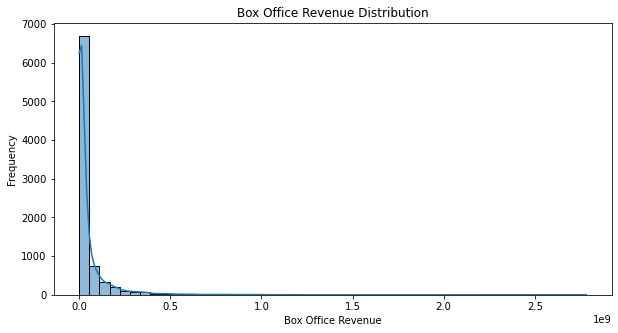

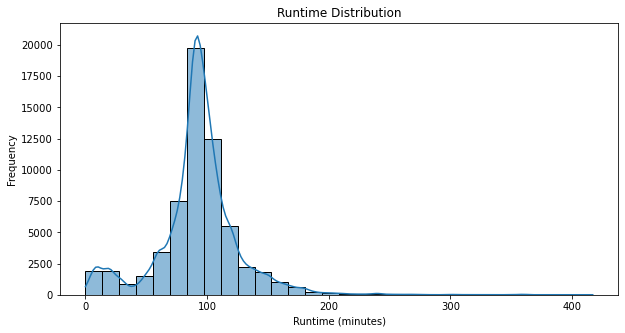

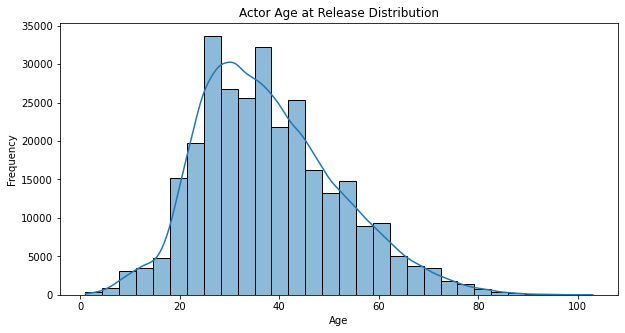

In [25]:

#histograms 
plt.figure(figsize=(10, 5))
sns.histplot(movie_metadata_df['box_office_revenue'].dropna(), bins=50, kde=True)
plt.title('Box Office Revenue Distribution')
plt.xlabel('Box Office Revenue')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(movie_metadata_df['runtime'].dropna(), bins=30, kde=True)
plt.title('Runtime Distribution')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(character_metadata_df['actor_age_at_release'].dropna(), bins=30, kde=True)
plt.title('Actor Age at Release Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


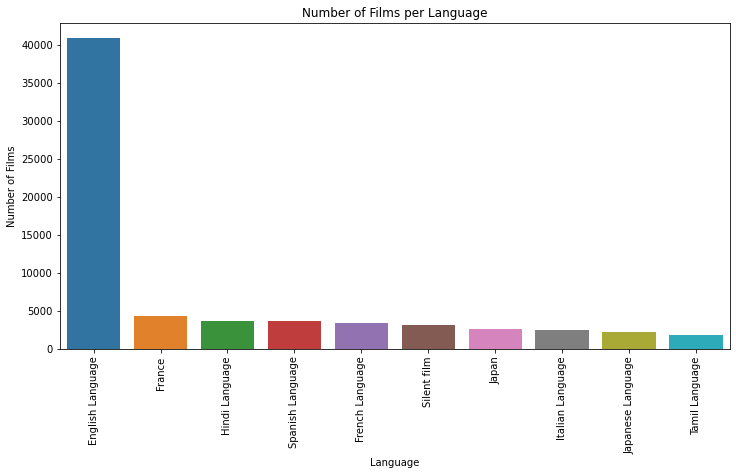

In [26]:
# 1. Number of films per language
language_counts = movie_metadata_df[list(unique_languages)].sum()

sorted_language_counts  = language_counts.sort_values(ascending=False)
top_languages = sorted_language_counts.head(10)


# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=top_languages.index, y=top_languages.values)
plt.title('Number of Films per Language')
plt.xticks(rotation=90)
plt.xlabel('Language')
plt.ylabel('Number of Films')
plt.show()



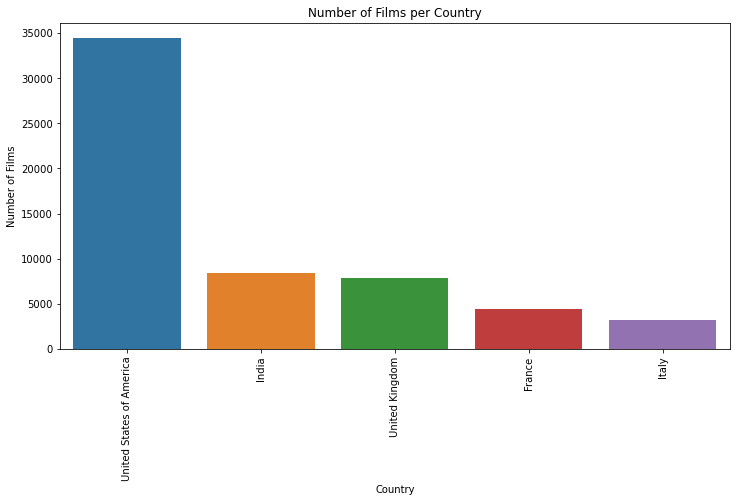

In [27]:

# 2. Number of films per country
countries_counts = movie_metadata_df[list(unique_countries)].sum()

sorted_countries_counts  = countries_counts.sort_values(ascending=False)
top_countries = sorted_countries_counts.head(5)


# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Number of Films per Country')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Number of Films')
plt.show()


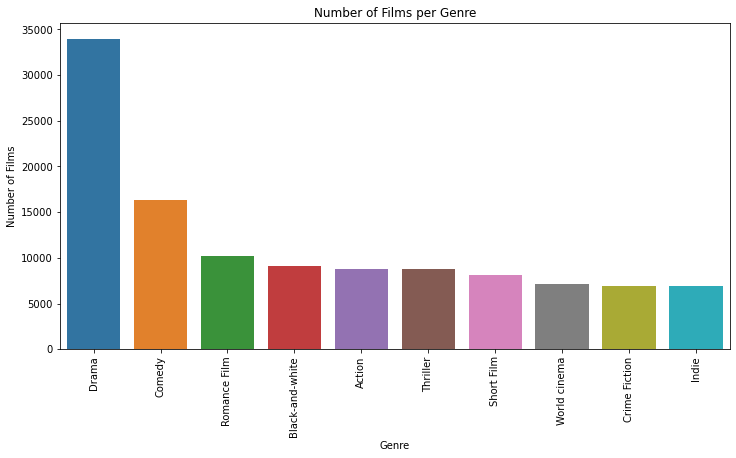

In [28]:
# 3. Number of films per genre
genres_counts = movie_metadata_df[list(unique_genres)].sum()

sorted_genres_counts  = genres_counts.sort_values(ascending=False)
top_genres = sorted_genres_counts.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.index, y=top_genres.values)
plt.title('Number of Films per Genre')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Number of Films')
plt.show()


In [29]:
#Getting years and extracting datas : 1st way

def process_release_date(df, column_to_load, new_column_name):
    def extract_year(value):
        if pd.isna(value):
            return np.nan
        try:
            # Try to convert to datetime first
            return pd.to_datetime(value).year
        except:
            # If it fails, check if it's a year
            if isinstance(value, (int, float)) or (isinstance(value, str) and value.isdigit()):
                return int(float(value))
            return np.nan

    # Apply the function to the 'Release_date' column
    df[new_column_name] = df[column_to_load].apply(extract_year)
    
    # Ensure the column is of type Int64 to handle NaN values
    df[new_column_name] = df[new_column_name].astype('Int64')
    


#Too much time

# process_release_date(movie_metadata_df, 'release_date' ,'release_year')


# Display the first few rows to verify the changes
# print(movie_metadata_df['release_year'].head())

In [30]:
#takes too much time

# process_release_date(character_metadata_df, 'actor_dob' ,'actor_year_ob')
# print(character_metadata_df['actor_year_ob'].head())

In [31]:
#takes too much time

# process_release_date(character_metadata_df, 'release_date' ,'release_year')
# print(character_metadata_df['release_year'].head())

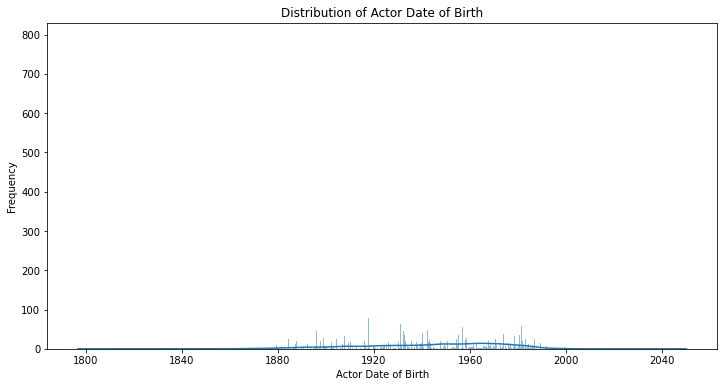

In [32]:
#Getting years and extracting datas : 2nd way


# Convert date columns to datetime format for consistency
movie_metadata_df['release_date'] = pd.to_datetime(movie_metadata_df['release_date'], errors='coerce')
character_metadata_df['release_date'] = pd.to_datetime(character_metadata_df['release_date'], errors='coerce')
character_metadata_df['actor_dob'] = pd.to_datetime(character_metadata_df['actor_dob'], errors='coerce')

# 4. Distribution of actor's date of birth (dob)
plt.figure(figsize=(12, 6))
sns.histplot(character_metadata_df['actor_dob'], bins=30, kde=True)
plt.title('Distribution of Actor Date of Birth')
plt.xlabel('Actor Date of Birth')
plt.ylabel('Frequency')
plt.show()


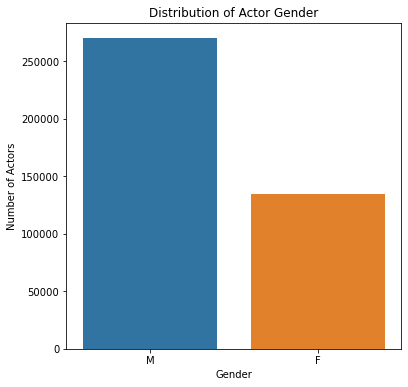

In [33]:

# 5. Distribution of actor gender
actor_gender_counts = character_metadata_df['actor_gender'].value_counts()
plt.figure(figsize=(6, 6))
sns.barplot(x=actor_gender_counts.index, y=actor_gender_counts.values)
plt.title('Distribution of Actor Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Actors')
plt.show()


In [34]:


# 6. Distribution of actor age at release
character_metadata_df['actor_age_at_release'] = (character_metadata_df['release_date'] - character_metadata_df['actor_dob']).dt.days / 365.25
plt.figure(figsize=(12, 6))
sns.histplot(character_metadata_df['actor_age_at_release'], bins=50, kde=True)
plt.title('Distribution of Actor Age at Release')
plt.xlabel('Actor Age at Release')
plt.ylabel('Frequency')
plt.show()


TypeError: unsupported operand type(s) for -: 'Timestamp' and 'float'

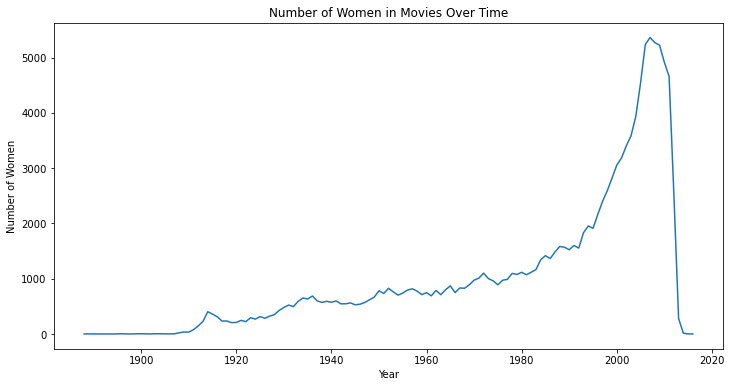

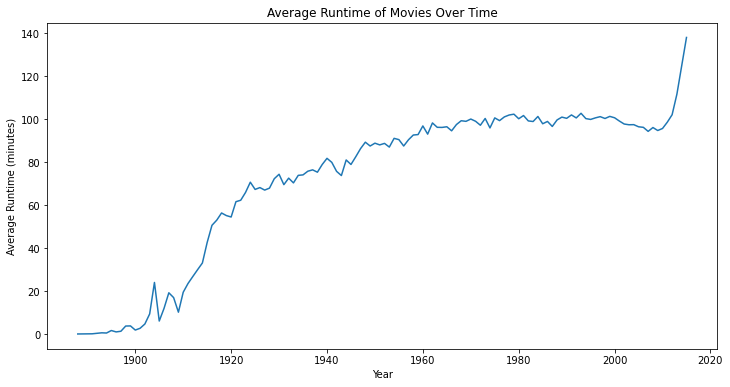

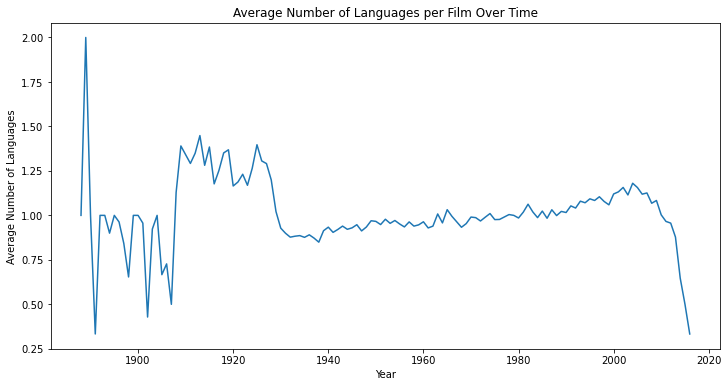

In [35]:


# 7. Time series analysis


# 7.1 Number of women in movies over time
women_counts_over_time = character_metadata_df[character_metadata_df['actor_gender'] == 'F'].groupby(character_metadata_df['release_date'].dt.year).size()
plt.figure(figsize=(12, 6))
sns.lineplot(x=women_counts_over_time.index, y=women_counts_over_time.values)
plt.title('Number of Women in Movies Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Women')
plt.show()



# 7.2 Runtime of movies over time
runtime_over_time = movie_metadata_df.groupby(movie_metadata_df['release_date'].dt.year)['runtime'].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x=runtime_over_time.index, y=runtime_over_time.values)
plt.title('Average Runtime of Movies Over Time')
plt.xlabel('Year')
plt.ylabel('Average Runtime (minutes)')
plt.show()

# 7.3 Number of languages per film over time
# Create a new column for the number of languages

movie_metadata_df['num_languages'] = movie_metadata_df['languages'].str.len()
languages_per_film_over_time = movie_metadata_df.groupby(movie_metadata_df['release_date'].dt.year)['num_languages'].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x=languages_per_film_over_time.index, y=languages_per_film_over_time.values)
plt.title('Average Number of Languages per Film Over Time')
plt.xlabel('Year')
plt.ylabel('Average Number of Languages')
plt.show()



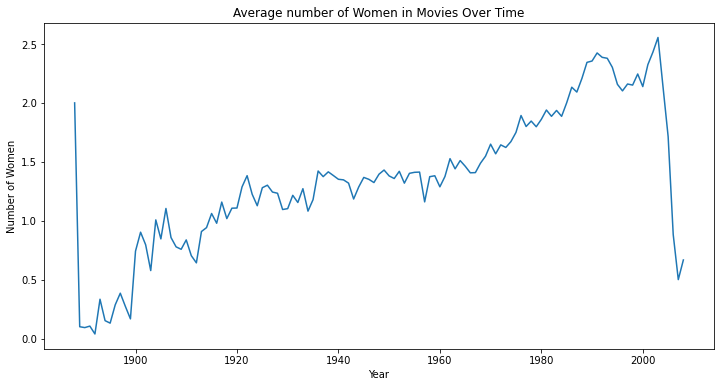

In [57]:
movie_metadata_df['release_date'] = pd.to_datetime(movie_metadata_df['release_date'], errors='coerce')
character_metadata_df['release_date'] = pd.to_datetime(character_metadata_df['release_date'], errors='coerce')

year_occurrences = movie_metadata_df['release_date'].dt.year.value_counts().sort_index()
year_occurrences = year_occurrences.rename_axis('release_year').reset_index(name='movie_count')


women_counts_over_time = (
    character_metadata_df[character_metadata_df['actor_gender'] == 'F']
    .groupby(character_metadata_df['release_date'].dt.year).size()
)
women_counts_over_time = women_counts_over_time.rename_axis('release_year').reset_index(name='female_actor_count')

Stat_de_droite = pd.merge(year_occurrences, women_counts_over_time, on='release_year', how='inner')
Stat_de_droite['relative_distr_of_women']=Stat_de_droite['female_actor_count']/Stat_de_droite['movie_count']

plt.figure(figsize=(12, 6))
sns.lineplot(x=women_counts_over_time.index+1888, y=Stat_de_droite['relative_distr_of_women'].values)
plt.title('Average number of Women in Movies Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Women')
plt.show()

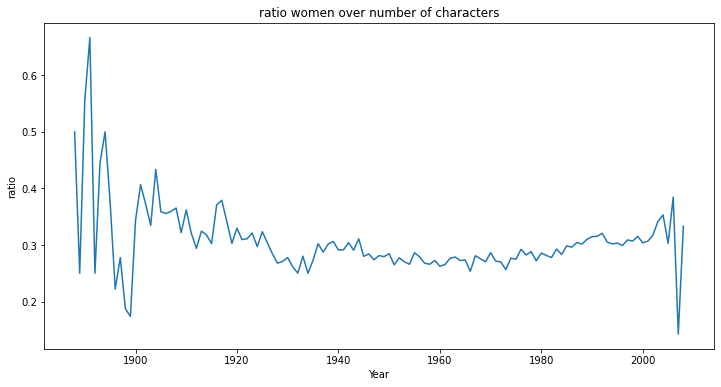

In [83]:
import pandas as pd

# Convert release_date columns to datetime
movie_metadata_df['release_date'] = pd.to_datetime(movie_metadata_df['release_date'], errors='coerce')
character_metadata_df['release_date'] = pd.to_datetime(character_metadata_df['release_date'], errors='coerce')

Number_of_character = character_metadata_df.groupby('wikipedia_movie_id').size().reset_index(name='character_count')

pd_merge = pd.merge(movie_metadata_df, Number_of_character, on='wikipedia_movie_id', how='inner')

pd_merge['release_year'] = pd_merge['release_date'].dt.year

year_occurrences = pd_merge['release_year'].value_counts().sort_index().reset_index(name='movie_count')
year_occurrences.rename(columns={'index': 'release_year'}, inplace=True)

year_character = pd_merge.groupby('release_year')['character_count'].mean().sort_index().reset_index(name='average_character_count')

women_counts_over_time = (
    character_metadata_df[character_metadata_df['actor_gender'] == 'F']
    .groupby(character_metadata_df['release_date'].dt.year).size()
)
women_counts_over_time = women_counts_over_time.rename_axis('release_year').reset_index(name='female_actor_count')

Stats = pd.merge(year_occurrences, year_character, on='release_year', how='inner')
Stats_2 = pd.merge(Stats, women_counts_over_time, on='release_year', how='inner')

Stats_2['ratio_of_women_over_total_number_of_character']=Stats_2['female_actor_count']/Stats_2['movie_count']/Stats_2['average_character_count']


plt.figure(figsize=(12, 6))
sns.lineplot(x=women_counts_over_time.index+1888, y=Stats_2['ratio_of_women_over_total_number_of_character'].values)
plt.title('ratio women over number of characters')
plt.xlabel('Year')
plt.ylabel('ratio')
plt.show()


In [ ]:
top_countries_index = top_countries.index


# 4. Tracer le nombre de films par pays au fil du temps
filtered_df = movie_metadata_df[movie_metadata_df['countries'].apply(lambda x: any(country in x for country in top_countries_index))]

# Convertir les listes de pays en lignes distinctes pour chaque pays dans chaque film
exploded_df = filtered_df.explode('countries')

# Filtrer pour conserver uniquement les lignes avec les pays du top
exploded_df = exploded_df[exploded_df['countries'].isin(top_countries_index)]

# Calculer le nombre de films par pays au fil du temps
films_per_country_over_time = (exploded_df.groupby([exploded_df['release_date'].dt.year, 'countries'])
                               .size()
                               .unstack(fill_value=0))



<Figure size 1600x1000 with 0 Axes>

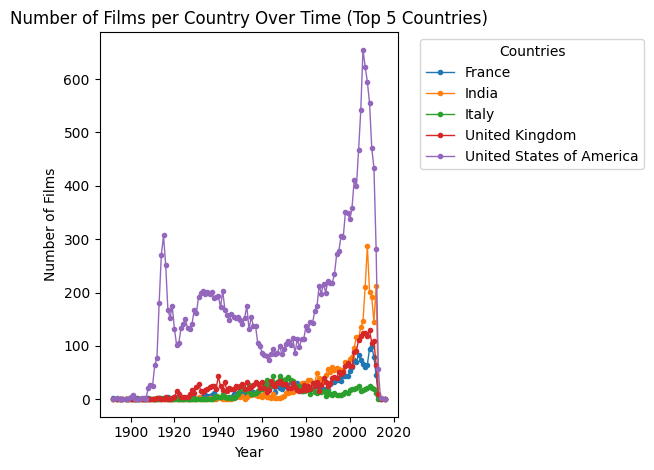

In [ ]:
# Tracer le nombre de films par pays au fil du temps
plt.figure(figsize=(16, 10))
films_per_country_over_time.plot(kind='line', marker='.', linewidth=1)
plt.title('Number of Films per Country Over Time (Top 5 Countries)')
plt.xlabel('Year')
plt.ylabel('Number of Films')
# plt.yscale('log')
plt.legend(title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

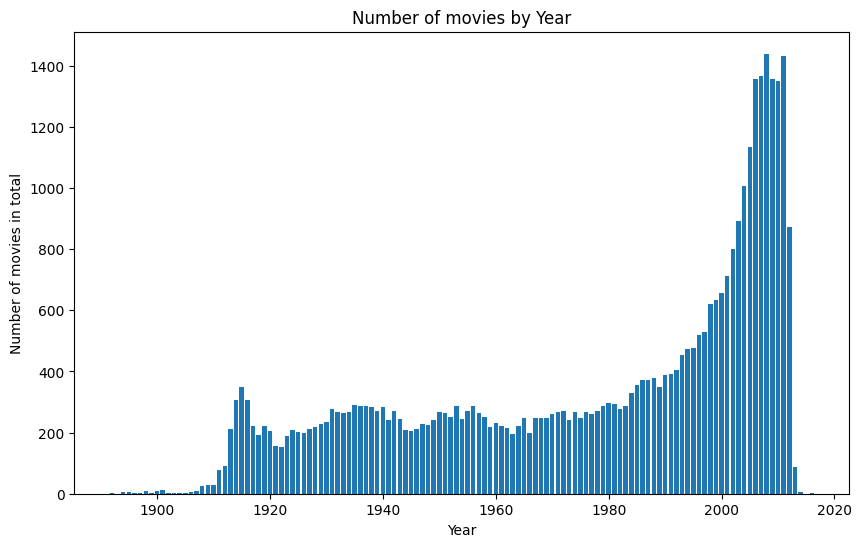

In [ ]:
year_occurrences = movie_metadata_df['release_date'].dt.year.value_counts().sort_index()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(year_occurrences.index, year_occurrences.values)
plt.xlabel('Year')
plt.ylabel('Number of movies in total')
plt.title('Number of movies by Year')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

### get all the war genres

In [ ]:
war_conflict_keywords = [
    "War", "Combat", "Conflict", "Battle", "Invasion", "Siege", "Occupation", 
    "Resistance", "Insurgency", "Militia", "Guerilla", "Army", "Soldier", 
    "Hostilities", "Skirmish", "Civil war", "Warfare", "Attack", "Defense", 
    "Rebellion", "Revolution", "Terrorism", "Patriotism", "Espionage", 
    "Propaganda", "Martial", "Paramilitary", "Navy", "Marines", "Air force", 
    "Armament", "Alliance", "Blockade", "Revenge", "Vengeance", "Nuclear", "Disaster","military" ,"Empire", "Spy"
]
conflict_genres = {genre for genre in unique_genres if any(keyword.lower() in genre.lower() for keyword in war_conflict_keywords)}
print(conflict_genres)


{'War film', 'Cold War', 'Revenge', 'Gulf War', 'Martial Arts Film', 'Private military company', 'Nuclear warfare', 'The Netherlands in World War II', 'Spy', 'War effort', 'Disaster', 'Alien invasion', 'Combat Films', 'Propaganda film', 'Anti-war film', 'British Empire Film', 'Natural disaster', 'Anti-war', 'Glamorized Spy Film'}


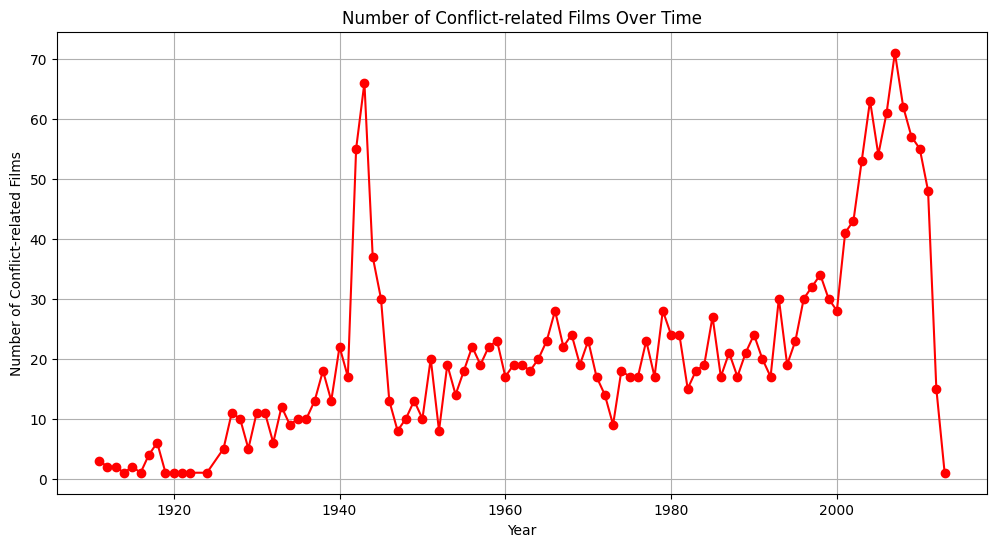

In [ ]:
# get the df with all genre belonging to conflict genres
conflict_movies = movie_metadata_df[
    movie_metadata_df['genres'].apply(lambda genres: any(genre in conflict_genres for genre in genres))
]

# Plot the histogram

conflict_movies_per_year = conflict_movies.groupby(conflict_movies['release_date'].dt.year).size()
plt.figure(figsize=(12, 6))
plt.plot(conflict_movies_per_year.index, conflict_movies_per_year.values, marker='o', color='red')
plt.title('Number of Conflict-related Films Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Conflict-related Films')
plt.grid(True)
plt.show()

In [ ]:
# Filtrer les films de conflit sortis en 2010
conflict_movies_2010 = conflict_movies[conflict_movies['release_date'].dt.year == 2010]

# Afficher les titres et genres des films pour voir les thèmes de conflits
conflict_movies_2010[['movie_name', 'genres']]

,movie_name,genres
203,Vanishing on 7th Street,"[Thriller, Horror, Supernatural, Gothic Film, ..."
1127,Of Gods and Men,"[History, Drama, Religious Film, World cinema,..."
3601,Kandahar,"[Action, Drama, War film]"
4723,Into the Fire,[War film]
6351,Quantum Apocalypse,"[Thriller, Science Fiction, Television movie, ..."
7912,White Material,"[Drama, Political drama, World cinema, War film]"
8001,Centurion,"[Thriller, Crime Fiction, Adventure, Costume A..."
8449,The Influence,"[Mystery, Romance Film, Action, Fantasy, War f..."
9055,The Tillman Story,"[History, Sports, War film, Political cinema, ..."
12116,The Weight of Chains,"[History, News, War film, Documentary]"


## Here is a big part to find all ethnicities

### Here there are the ethnicities (8 not found)

In [ ]:
#  Musulman ? 
unique_ethnicities = character_metadata_df['actor_ethnicity'].dropna().unique()
# print(unique_ethnicities)

unique_ethnicities_names = ["Canadian", "African Americans", 
"Omaha", "Jewish", "Irish Americans", "Indian Americans", "Italians", "German Americans", "Indian", "Ezhava", "Malayalis", 
"Taiwanese", "", "South Korean", "Armenians", "Marathi", "Lithuanian Americans", "Dominican", "Black", 
"Italian Americans", "Danish Americans", "Jewish American", "Scottish Americans", "Puerto Ricans", "English", "Irish", 
"European Americans", "Russian Americans", "English American", "Gujarati", "Spanish Americans", "Biharis", "Nair", 
"Cuban Americans", "White", "Canadian Americans", "Dutch Jewish", "Russians", "British Nigerians", 
"Yoruba", "Japanese", "Nordic and Scandinavian Americans", "Filipino Americans", "Swedish Americans", "Finnish Americans", 
"Koreans", "French", "Welsh", "Blanco estadounidense", "Bengalis", "Uruguayans", "Iranians", "Mexicans", "Dutch Americans", "Hungarian Americans", "Spaniards", 
"Gaud Saraswat Brahmin", "Bunt", "Afghans in India", "Serbian", "Baiuvarii", "Garhwali people", "Hispanic and Latino Americans", "Swedes", "", "Sindhis", "Tamils", "Italian Canadians", 
"Asian Americans", "Guyanese Americans", "Mexican Americans", 
"Japanese Americans", "Punjabis", "Bengali Hindus", "Kanyakubja Brahmin", "British", "White British", "Scottish Australians", "White Africans of European ancestry", 
"Americans", "Germans", "Stateside Puerto Ricans", "Cherokee", 
"Tamil Brahmin", "Serbian American", "Dominican Americans", 
"Polish Americans", "Austrians", "Hongkongers", "Rusyn Americans",
"French Canadians", "Musulman", "Pashtun", "british indians", 
"Telugu", "Kayastha", "Irish in Great Britain", "Scotch-Irish Americans", 
"Filipino people", "Sri Lankan Tamils", "", "Asian", "Jamaican American", "Brahmin", "Telugu Brahmin", 
"Italian Australians", "Australian Americans", "Czech Americans", 
"Jat Sikh", "Kashmiri Pandit", "Jats", "Serbs of Croatia", "Black Irish", 
"Scottish", "British Americans", "Norwegians", "Bosnians", "Sicilian Americans", 
"English Australians", "Australians", "Danes", "French Chileans", "Multiracial Americans", 
"Albanian Americans", "Austrian Americans", "Romani", "Greeks in South Africa", 
"French Americans", "Native Hawaiians", "Slovaks", "Chinese Americans", "Greek Americans", 
"Hungarians", "Romanichal", "Parsis", "Indonesian Americans", "Colombian Americans", 
"African-American Jews", "Slovak Americans", "Black Canadians", "Lebanese Americans", 
"Anglo-Celtic Australians", "", "Pathani", "Swiss", 
"Indigenous Australians", "Algerian", "Latvians", "Criollo", "Norwegian Americans", "Belgians", "Portuguese Americans", 
"Bolivian Americans", "Kiwi", "Konkani", "Cubans", "Samoan Americans", 
"Armenian Americans", "Afro–Trinidadians and Tobagonians", "Moroccan Americans", 
"Dravida", "Irish Canadians", "Scottish Canadians", "Kannadigas", "Italian Brazilians", 
"Taiwanese Americans", "English Canadians", "Croats", "Cajuns", "Colombian Australians", 
"Pakistani", "Syrian Americans", "Océano-Américains", "Chilean American", "Tamil Americans", 
"Israelis", "Afro-Cubans", "Dutch", "White South Africans", "Welsh Americans", "Nepali Indian", 
"Slavs", "First Nations in Canada", "British Pakistanis", "Iranians in the United Kingdom", 
"Akan", "Croatian Canadians", "Maori", "Mizrahi Jews", "Black British", "Chinese Filipinos", 
"Pakistani Canadians", "Indigenouss of the Americas", "Native Americans in the United States", 
"Estonians", "Dalmatian Italians", "Ashkenazi Jews", "Romanian Americans", "eurasian", "Chinese Singaporeans", "Saliya", "indian", 
"Korean Americans", "Moroccan Jews", "Belgians", "British Jews", "Lebanese", "Catalans", "Sikhs", "Belarusians", 
"Niyogi Brahmin", "Samoan New Zealanders", "Blackfoot Confederacy", "British Chinese", "Polish Canadians", 
"Chitrapur Saraswat Brahmin", "Italian and German", "Sámis", "Soviet", "Filipino Australians", "Karnataka Brahmin", 
"Czechs", "Russian Canadians", "Argentines", "Anglo-Indian", "Czesh american", "Anglo-Welsh", "Anglo-Scot", 
"Croatian Americans", "Hispanics", "Tulu", "Serbs in the United Kingdom", "Kapampangan", "Ilocano", "Ojibwe",
"Marwari people", "Brazilian Americans", "German Canadians", "Mohyal Brahmin", "Castilians", "Bhutia", "Iraqi American", 
"Bosniaks", "Filipino people of Spanish ancestry", "Sri Lankan Tamil diaspora", "Sephardic Jews", "Brazilians", "Berber", 
"Serbian Canadians", "Israeli Americans", "Greek Canadians", "Moroccans", "Jews in India", "Kikuyu", "Xhosa", "Egyptians", 
"Polish", "Dutch Australians", "Serbs in North Macedonia", "Arab Americans", "Croats", "Thai Chinese", "Galicians", 
"Palestinian American", "Welsh Italians", "Greek Cypriots", "Poles in the United Kingdom", "Ecuadorian Americans", 
"Australians in the United Kingdom", "Mohawk", "Inuit", "Sioux", "Lumbee", "Malaysian Chinese", "Hindkowans", 
"Anglo-Irish", "Canadians in the United Kingdom", "Mangaloreans", "Slovene Americans", "Aromanians",
"Swedish-speaking population of Finland", "Bulgarian Canadians", "mixed", "Hmong Americans", "Ukrainian Americans", 
"Arabs in Bulgaria", "British Asians", "Koryo-saram", "White Latin American", "Italians in the United Kingdom", 
"White people", "Burmese Americans", "Indian Canadians", "Finns", "Irish Australians", "Lao", "Croatian Australians", 
"Vietnamese", "Kashmiris", "Rohilla", "Hondurans", "South African Americans", "Indians in France", "Chinese Indonesians", 
"", "Danish Canadians", "Ukrainians", "Irish and Italian", "Ghanaian Americans", "Polish Australians", 
"Agrawal", "Albanians", "Chinese Canadians", "Javanese", "Sudanese Arabs", "Peruvians in the United Kingdom", 
"Sierra Leoneans in the United Kingdom", "Venezuelans", "Arabs", "Mudaliar", "Sinhalese", "Cree", "Cambodian Americans", 
"Portuguese", "Italian people", "Jordanian People", "Chinese Jamaicans", "Acadians", "", "Muhajir",
"Honduran Americans", "Lebanese Mexicans", "Serbian Australian", "Colombians", "Ghanaians", "Hindú", "Chileans", 
"Indian Canadians", "Persians", "Africains", "Bengali Brahmin", "Aboriginal Australians", "Swedish Canadians", 
"Sudanese Australians", "Viêtnamo-Américains", "viennese", "Haitian Americans", "Pakistani Americans", "Kabyle", 
"Bahamian Americans", "British Jamaicans", "French-speaking Quebecer", "Native American", "Assyrian", "Rajput", 
"Turkish Americans", "Chileans in the United Kingdom", "Gibraltarians", "Sri Lankan Americans", "Icelanders", 
"Copts", "Latin Americans", "Asante", "Choctaw", "Louisiana Creole", "Latin American migration to the United Kingdom", 
"Litvaks", "Salvadoran Americans", "Venezuelan Americans", "Khatri", "Latino", "Nigerian Americans", "Dinka", "Apache", 
"Yugoslavs", "Swiss Australian", "Iranis", "Bulgarians", "Five Nations", "Somali", "Arab Mexicans", "Ryukyuan", 
"Spanish-Filipino", "Canadian Australians", "Böhmen", "Ukrainian Canadians", "Austrians in the United Kingdom", 
"German - Irish", "Dutch Canadians", "Luxembourgish Americans", "Iranian Americans", "Mandinka", "Tibetan", 
"Spanish of Filipino ancestry", "Corsicans", "Acehnese", "Sherpa", "Romanians", "Malagasys", "Filipino Mestizos", 
"Indian Australians", "Punjabi diaspora", "Armenians in Italy", "Serbs of Bosnia and Herzegovina", "Manchu", "Buryats", 
"Cheyenne", "Quebecois", "Armenians in Russia", "Dene", "Multiracial", "Spaniards in Mexico", "", "Gitanos", 
"Chettiar", "Russians in the Baltic states", "Iñupiat", "Transylvanian Saxons", "Greek Australians", "Indo-Guyanese", 
"Latvian Americans", "Panamanian Americans", "Dalit", "Afro-Asians", "Basques", "Indo-Caribbean", "British African-Caribbean", 
"Tatars", "Tejanos", "Lebanese in the United Kingdom", "Métis", "Ossetians", "Hungarians", "Thai Americans", 
"Filipinos in the United Kingdom", "German Brazilians", "Sinhala- Tamil", "Zhuang", "Italian immigration to Mexico", 
"Japanese/latina", "Indian people", "", "Manx", "Japanese Brazilians", "Indian Diaspora", "Ho-Chunk", 
"Greeks in the United Kingdom", "Barbadian Americans", "Wolof", "Culture of Palestine", "Czech Australians", 
"Israeli Jews", "Slovenes", "Nez Perce", "Swedish Australians", "Afro-Guyanese", "Dogras", "Kurds", 
"demographics of Iraq", "Irish people", "Black Hispanic and Latino Americans", "Gin", "Hazaras", "Hutsuls", 
"Aymara", "Oneida", "Tahitians", "Mediterranean", "Azerbaijanis", "Bangladeshi Americans", "Thai", 
"Iranian Canadians", "Afrikaners", "White Canadian", "Ethnic groups in the Caucasus", "Sierra Leone Creole", 
"Georgians", "Goans", "Han Chinese"]


In [ ]:
# Afficher le résultat final
None_count = np.sum(np.array(unique_ethnicities_names) == "")
print("Number of all singular ethnicities not discovered yet: ", None_count)
match_index = np.where(np.array(unique_ethnicities_names) == "")[0]
print(match_index)
print(unique_ethnicities[match_index])

Number of all singular ethnicities not discovered yet:  8
[ 12  64 100 142 304 328 412 441]
['/m/02p1pl6' '/m/047l_90' '/m/0bkbz' '/m/04tvpv' '/m/0cc5y74'
 '/m/03ck8x1' '/m/03m3p6w' '/m/043_z22']


### No need to understand (just a save)

In [ ]:

# #starting getted with "import requests"
# print(unique_ethnicities.shape)
# ethnicities_encoding_1 = [('/m/0152s7', 'Anglo-Irish people'), ('/m/0ch3pqf', 'Belgians'), ('/m/04jq32s', 'Nepali Indian'), ('/m/0br_9j', 'Romani people in Spain'), ('/m/033tf_', 'Irish Americans'), ('/m/086wp0', 'Ilocano'), ('/m/04l_pt', 'Thai Chinese'), ('/m/048sp5', 'Ezhava'), ('/m/0gkxl2', 'Stateside Puerto Ricans'), ('/m/0960kn', 'Danish Canadians'), ('/m/04hqxn', 'Transylvanian Saxons'), ('/m/041rx', 'Jewish people'), ('/m/027vy0s', 'White Latin American'), ('/m/01267', 'Albanians'), ('/m/01vsch', 'Aromanians'), ('/m/03ty8_', 'Lithuanian Jews'), ('/m/04lhn7b', 'South African Americans'), ('/m/0466nw8', 'Lebanese people'), ('/m/0g48m4', 'Lebanese Americans'), ('/m/0dryh9k', 'Indians'), ('/m/07mqps', 'Dutch Americans'), ('/m/09kr66', 'Russian Americans'), ('/m/0222qb', 'Italians'), ('/m/0fqz6', 'Cajun'), ('/m/022dp5', 'Polish Americans'), ('/m/03sk2', 'demographics of Iraq'), ('/m/0583cz', 'Kayastha'), ('/m/02w7gg', 'English people'), ('/m/01qhm_', 'German Americans'), ('/m/064b9n', 'Omaha Tribe of Nebraska'), ('/m/0165md', 'Ryukyuan people'), ('/m/0b8yvr', 'Sudanese Australians'), ('/m/0cx3p', 'Berber'), ('/m/02sch9', 'Punjabis'), ('/m/059_w', 'Native Americans in the United States'), ('/m/071x0k', 'Filipino people'), ('/m/062_25', 'Italian Brazilians'), ('/m/01vr3v', 'Romanians'), ('/m/017sq0', 'Eurasian'), ('/m/0ffj5g', 'Austrian Americans'), ('/m/06mvq', 'Swedes'), ('/m/0d2by', 'Chinese Americans'), ('/m/04mvp8', 'Malayali'), ('/m/03r_k', 'Inuit'), ('/m/08cjt2', 'Karnataka Brahmins'), ('/m/047q05d', 'Lebanese people in the United Kingdom'), ('/m/09r2kh', 'peoples of the Caucasus'), ('/m/06k6sl', 'Swedish Canadians'), ('/m/09fqz7', 'Croatian Australians'), ('/m/03ts0c', 'French'), ('/m/06fczy', 'Black Irish'), ('/m/07s49c2', 'Chileans in the United Kingdom'), ('/m/04gfy7', 'Indian Americans'), ('/m/0hj35', 'Xhosa people'), ('/m/01trsl', 'First Nations'), ('/m/02wcbj_', 'Bolivian Americans'), ('/m/03b_13l', 'Swedish Australian'), ('/m/0x67', 'African Americans'), ('/m/03sx6v', 'German Canadians')]
# print(len(ethnicities_encoding_1))


In [ ]:

# from selenium.webdriver.common.by import By
# from selenium.webdriver.support.ui import WebDriverWait
# from selenium.webdriver.support import expected_conditions as EC
# from selenium import webdriver

# def resolve_freebase_id_selenium(freebase_id):
#     url = f'https://angryloki.github.io/mreid-resolver/#{freebase_id}'

#     driver = webdriver.Chrome()
#     driver.get(url)

#     try:
#         # Wait for the specific element to load (10 seconds timeout)
#         WebDriverWait(driver, 10).until(
#             EC.presence_of_all_elements_located((By.CLASS_NAME, 'border-t'))
#         )

#         # After the wait, retrieve the updated page source
#         soup = BeautifulSoup(driver.page_source, 'html.parser')

#         # Find all <td> elements with the specified class
#         all_tds = soup.find_all('td', class_='border-t p-1 align-top border-zinc-200')
# #         print(all_tds)
#         if all_tds:
# #             print("All <td> elements found:")
# #             for td in all_tds:
# #                 print(td.get_text(strip=True))
#             return str(all_tds[1].get_text(strip=True))
#         else:
#             print("No <td> elements found with the specified class.")

#     except Exception as e:
#         print(f"Error: {e}, {freebase_id}")
#         return np.nan
#     finally:
#         # Add a delay for observation
#         driver.quit()

# # Example usage
# freebase_ids = np.array(unique_ethnicities.copy()) 
# # freebase_ids = ["/m/0761bp", "/m/04mmhj"]
# the_other = []
# for fb_id in freebase_ids:
#     the_other.append(resolve_freebase_id_selenium(fb_id))
# #     resolve_freebase_id_selenium(fb_id)


In [ ]:
# print(the_other)
# the_other = np.where(the_other == None, np.nan, the_other)

# # Étape 1: Élever tous les "people"
# # Remplacer 'people' par une chaîne vide si 'people' est dans l'élément
# the_other = np.where(np.char.find(the_other.astype(str), 'people') != -1, 
#                   np.char.replace(the_other.astype(str), ' people', ''), the_other)

# # Étape 2: Remplacer les chaînes vides par des NaN
# the_other[the_other == ''] = np.nan

In [ ]:
# # names got from selenium lib
# names = np.array(['nan', 'African Americans', 'Omaha', 'Jewish', 'Irish Americans', 'Indian Americans', 'nan', 'German Americans', 'Indian', 'Ezhava', 'Malayalis', 'Taiwanese', 'nan', 'nan', 'Armenians', 'Marathi', 'Lithuanian Americans', 'nan', 'Black', 'Italian Americans', 'Danish Americans', 'nan', 'Scottish Americans', 'Puerto Ricans', 'English', 'Irish', 'European Americans', 'Russian Americans', 'nan', 'Gujarati', 'nan', 'Biharis', 'Nair', 'Cuban Americans', 'White', 'Canadian Americans', 'nan', 'nan', 'British Nigerians', 'Yoruba', 'Japanese', 'Nordic and Scandinavian Americans', 'Filipino Americans', 'Swedish Americans', 'Finnish Americans', 'Koreans', 'French', 'Welsh', 'Blanco estadounidense', 'Bengalis', 'Uruguayans', 'Iranians', 'Mexicans', 'Dutch Americans', 'Hungarian Americans', 'Spaniards', 'Gaud Saraswat Brahmin', 'Bunt', 'Afghans in India', 'nan', 'nan', 'nan', 'Hispanic and Latino Americans', 'Swedes', 'nan', 'Sindhis', 'Tamils', 'Italian Canadians', 'Asian Americans', 'Guyanese Americans', 'Mexican Americans', 'Japanese Americans', 'Punjabis', 'Bengali Hindus', 'Kanyakubja Brahmin', 'British', 'White British', 'Scottish Australians', 'White Africans of European ancestry', 'Americans', 'Germans', 'Stateside Puerto Ricans', 'Cherokee', 'Tamil Brahmin', 'nan', 'Dominican Americans', 'Polish Americans', 'Austrians', 'Hongkongers', 'Rusyn Americans', 'French Canadians', 'Musulmán', 'nan', 'Inmigración india en el Reino Unido', 'Telugu', 'Kayastha', 'Irish in Great Britain', 'Scotch-Irish Americans', 'nan', 'Sri Lankan Tamils', 'nan', 'Asian', 'nan', 'Brahmin', 'Telugu Brahmin', 'Italian Australians', 'Australian Americans', 'Czech Americans', 'Jat Sikh', 'nan', 'Jats', 'Serbs of Croatia', 'Black Irish', 'Scottish', 'British Americans', 'Norwegians', 'Bosnians', 'Sicilian Americans', 'English Australians', 'Australians', 'Danes', 'French Chileans', 'Multiracial Americans', 'Albanian Americans', 'Austrian Americans', 'Romani', 'Greeks in South Africa', 'French Americans', 'Native Hawaiians', 'Slovaks', 'Chinese Americans', 'Greek Americans', 'Hungarians', 'Romanichal', 'Parsis', 'Indonesian Americans', 'Colombian Americans', 'African-American Jews', 'nan', 'Black Canadians', 'nan', 'Anglo-Celtic Australians', 'nan', 'Pathani', 'Swiss', 'nan', 'nan', 'Latvians', 'Criollo', 'Norwegian Americans', 'Belgians', 'Portuguese Americans', 'Bolivian Americans', 'Kiwi', 'Konkani', 'Cubans', 'Samoan Americans', 'Armenian Americans', 'Afro–Trinidadians and Tobagonians', 'Moroccan Americans', 'nan', 'Irish Canadians', 'Scottish Canadians', 'Kannadigas', 'nan', 'Taiwanese Americans', 'English Canadians', 'nan', 'Cajuns', 'Colombian Australians', 'パキスタン人', 'Syrian Americans', 'Océano-Américains', 'nan', 'Tamil Americans', 'Israelis', 'Afro-Cubans', 'Dutch', 'White South Africans', 'Welsh Americans', 'nan', 'Slavs', 'First Nations in Canada', 'British Pakistanis', 'Iranians in the United Kingdom', 'Akan', 'Croatian Canadians', 'Māori', 'Mizrahi Jews', 'Black British', 'Chinese Filipinos', 'Pakistani Canadians', 'Indigenouss of the Americas', 'Native Americans in the United States', 'nan', 'Dalmatian Italians', 'Ashkenazi Jews', 'Romanian Americans', 'ユーラシアン', 'Chinese Singaporeans', 'Saliya', 'nan', 'Korean Americans', 'Moroccan Jews', 'nan', 'British Jews', 'Lebanese', 'Catalans', 'Sikhs', 'Belarusians', 'Niyogi Brahmin', 'Samoan New Zealanders', 'Blackfoot Confederacy', 'British Chinese', 'Polish Canadians', 'Chitrapur Saraswat Brahmin', 'nan', 'Sámis', 'Soviet', 'Filipino Australians', 'Karnataka Brahmin', 'Czechs', 'Russian Canadians', 'Argentines', 'Anglo-Indian', 'nan', 'nan', 'nan', 'Croatian Americans', 'Hispanics', 'Tulu', 'Serbs in the United Kingdom', 'Kapampangan', 'Ilocano', 'Ojibwe', 'nan', 'Brazilian Americans', 'nan', 'Mohyal Brahmin', 'Castilians', 'Bhutia', 'nan', 'Bosniaks', 'nan', 'Sri Lankan Tamil diaspora', 'Sephardic Jews', 'Brazilians', 'nan', 'Serbian Canadians', 'Israeli Americans', 'Greek Canadians', 'Moroccans', 'nan', 'Kikuyu', 'Xhosa', 'Egyptians', 'Polish', 'Dutch Australians', 'Serbs in North Macedonia', 'Arab Americans', 'Croats', 'Thai Chinese', 'Galicians', 'nan', 'Welsh Italians', 'Greek Cypriots', 'Poles in the United Kingdom', 'Ecuadorian Americans', 'nan', 'Mohawk', 'Inuit', 'Sioux', 'Lumbee', 'Malaysian Chinese', 'Hindkowans', 'Anglo-Irish', 'Canadians in the United Kingdom', 'Mangaloreans', 'Slovene Americans', 'Aromanians', 'Swedish-speaking population of Finland', 'Bulgarian Canadians', 'nan', 'Hmong Americans', 'Ukrainian Americans', 'Arabs in Bulgaria', 'British Asians', 'Koryo-saram', 'nan', 'Italians in the United Kingdom', 'nan', 'Burmese Americans', 'nan', 'Finns', 'Irish Australians', 'Lao', 'Croatian Australians', 'Vietnamese', 'Kashmiris', 'Rohilla', 'Hondurans', 'South African Americans', 'Indians in France', 'Chinese Indonesians', 'nan', 'Danish Canadians', 'Ukrainians', 'nan', 'Ghanaian Americans', 'Polish Australians', 'Agrawal', 'Albanians', 'Chinese Canadians', 'Javanese', 'Sudanese Arabs', 'Peruvians in the United Kingdom', 'Sierra Leoneans in the United Kingdom', 'Venezuelans', 'Arabs', 'nan', 'Sinhalese', 'Cree', 'Cambodian Americans', 'Portuguese', 'nan', 'nan', 'Chinese Jamaicans', 'Acadians', 'nan', 'nan', 'Honduran Americans', 'Lebanese Mexicans', 'nan', 'Colombians', 'Ghanaians', 'Hindú', 'Chileans', 'Indian Canadians', 'Persians', 'Africains', 'Bengali Brahmin', 'Aboriginal Australians', 'Swedish Canadians', 'Sudanese Australians', 'Viêtnamo-Américains', 'nan', 'Haitian Americans', 'Pakistani Americans', 'Kabyle', 'Bahamian Americans', 'British Jamaicans', 'nan', 'nan', 'Assyrian', 'Rajput', 'Turkish Americans', 'Chileans in the United Kingdom', 'Gibraltarians', 'Sri Lankan Americans', 'Icelanders', 'Copts', 'nan', 'Asante', 'Choctaw', 'Louisiana Creole', 'Latin American migration to the United Kingdom', 'Litvaks', 'Salvadoran Americans', 'Venezuelan Americans', 'Khatri', 'Latino', 'Nigerian Americans', 'Dinka', 'Apache', 'Yugoslavs', 'nan', 'nan', 'Bulgarians', 'Five Nations', 'Somali', 'Arab Mexicans', 'Ryukyuan', 'nan', 'Canadian Australians', 'Böhmen', 'Ukrainian Canadians', 'Austrians in the United Kingdom', 'nan', 'Dutch Canadians', 'Luxembourgish Americans', 'Iranian Americans', 'Mandinka', 'Tibetan', 'Spanish of Filipino ancestry', 'Corsicans', 'Acehnese', 'Sherpa', 'Romanians', 'Malagasys', 'Filipino Mestizos', 'Indian Australians', 'Punjabi diaspora', 'Armenians in Italy', 'Serbs of Bosnia and Herzegovina', 'Manchu', 'Buryats', 'Cheyenne', 'nan', 'Armenians in Russia', 'Dene', 'Multiracial', 'Spaniards in Mexico', 'nan', 'Gitanos', 'Chettiar', 'Russians in the Baltic states', 'Iñupiat', 'Transylvanian Saxons', 'Greek Australians', 'Indo-Guyanese', 'Latvian Americans', 'Panamanian Americans', 'Dalit', 'Afro-Asians', 'Basques', 'Indo-Caribbean', 'British African-Caribbean', 'Tatars', 'Tejanos', 'Lebanese in the United Kingdom', 'Métis', 'Ossetians', 'nan', 'Thai Americans', 'nan', 'German Brazilians', 'nan', 'Zhuang', 'Italian immigration to Mexico', 'nan', 'nan', 'nan', 'Manx', 'Japanese Brazilians', 'nan', 'Ho-Chunk', 'Greeks in the United Kingdom', 'Barbadian Americans', 'Wolof', 'Culture of Palestine', 'Czech Australians', 'Israeli Jews', 'Slovenes', 'Nez Perce', 'Swedish Australians', 'Afro-Guyanese', 'Dogras', 'Kurds', 'nan', 'nan', 'Black Hispanic and Latino Americans', 'Gin', 'Hazaras', 'Hutsuls', 'Aymara', 'Oneida', 'nan', 'nan', 'Azerbaijanis', 'Bangladeshi Americans', 'Thai', 'Iranian Canadians', 'Afrikaners', 'nan', 'Ethnic groups in the Caucasus', 'Sierra Leone Creole', 'Georgians', 'Goans', 'Han Chinese'], dtype=object)

# # finding nan and replacing with None
# unique_ethnicities_names = np.where(names == 'nan', None, names).copy()


In [ ]:
# codes_not_discovered = unique_ethnicities[np.where(unique_ethnicities_names == None)]
# ethnicity_codes = [code for code, _ in ethnicities_encoding_1]
# ethnicity_names = [name for _, name in ethnicities_encoding_1]
# matching_names = [ethnicity_names[i] for i, code in enumerate(ethnicity_codes) if code in codes_not_discovered]
# matching_indices = [i for i, code in enumerate(ethnicity_codes) if code in codes_not_discovered]

# print("Indices des codes trouvés :", matching_indices)
# print("Indices des codes trouvés :", matching_names)


In [ ]:
# # Convertir ethnicities_encoding_1 en un dictionnaire pour un accès facile
# encoding_dict = {code: name for code, name in ethnicities_encoding_1}

# # Parcourir unique_ethnicities_names et remplacer None si un code correspondant est trouvé
# for i, code in enumerate(unique_ethnicities):
#     if unique_ethnicities_names[i] is None and code in encoding_dict:
#         unique_ethnicities_names[i] = encoding_dict[code]

# # Afficher le résultat final
# None_count = np.sum(unique_ethnicities_names == None)
# print("Number of all singular ethnicities not discovered yet: ", None_count)


In [ ]:
# # finding not discovered ethnicities
# codes_not_discovered = unique_ethnicities[np.where(unique_ethnicities_names == None)]
# print("Codes not discovered yet: ", codes_not_discovered)


# # to understand :
# print("Number of all singular ethnicities not discovered yet: ", None_count)
# print("size of all singular ethnicities check: " , len(names))

In [ ]:

# from selenium.webdriver.common.by import By
# from selenium.webdriver.support.ui import WebDriverWait
# from selenium.webdriver.support import expected_conditions as EC
# from selenium import webdriver
# from bs4 import BeautifulSoup
# import numpy as np
# def resolve_freebase_id_selenium(freebase_id):
    
#     url = f'https://www.google.com/search?kgmid={freebase_id}&hl=en&gl=US'
#     # Setup Chrome options
#     options = webdriver.ChromeOptions()
#     options.add_argument('window-size=1920,1080')  # Set the window size
# #     options.add_argument('user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.61 Safari/537.36')
#     options.add_argument('--headless')  # Run in headless mode
# #     options.add_argument('--no-sandbox')
# #     options.add_argument('--disable-dev-shm-usage')
#     driver = webdriver.Chrome(options=options)
#     driver.get(url)

#     try:
#         # Wait for the page to load completely
#         WebDriverWait(driver, 10).until(
#             EC.presence_of_all_elements_located((By.TAG_NAME, 'head'))
#         )

#         # Retrieve the page source and parse with BeautifulSoup
#         soup = BeautifulSoup(driver.page_source, 'html.parser')

#         # Find the <title> tag and get its text
#         title_tag = soup.find('title')
#         if title_tag:
#             title_text = title_tag.get_text(strip=True)
#             return title_text
#         else:
#             print("No <title> tag found on the page.")

#     except Exception as e:
#         print(f"Error: {e}, {freebase_id}")
#         return None
#     finally:
#         driver.quit()
# # Example usage
# freebase_ids = np.array(unique_ethnicities_codes.copy()) 
# # freebase_ids = ["/m/0761bp", "/m/04mmhj"]
# the_other = [resolve_freebase_id_selenium(fb_id) for fb_id in freebase_ids]
# print(the_other)


In [ ]:
# the_other = np.array(the_other)
# # Remplacer 'people' par une chaîne vide si 'people' est dans l'élément
# the_other = np.where(np.char.find(the_other.astype(str), ' - Google Search') != -1, 
#                   np.char.replace(the_other.astype(str), ' - Google Search', ''), the_other)

# # Étape 2: Remplacer les chaînes vides par des NaN
# the_other[the_other == ''] = None

In [ ]:
# print(the_other)

In [ ]:

# # Parcourir unique_ethnicities_names et remplacer None si un code correspondant est trouvé
# for i, code in enumerate(unique_ethnicities):
#     # Vérifier si l'élément dans unique_ethnicities_names est None
#     if unique_ethnicities_names[i] is None:
#         # Vérifier si le code est présent dans codes_not_discovered
#         match_index = np.where(codes_not_discovered == code)[0]
#         if match_index.size > 0:
#             # Remplacer None par la valeur correspondante dans the_other
#             unique_ethnicities_names[i] = the_other[match_index[0]]

# # Afficher le résultat final
# None_count = np.sum(np.array(unique_ethnicities_names) == None)
# print("Number of all singular ethnicities not discovered yet: ", None_count)



Use plot summaries to see trends accross time

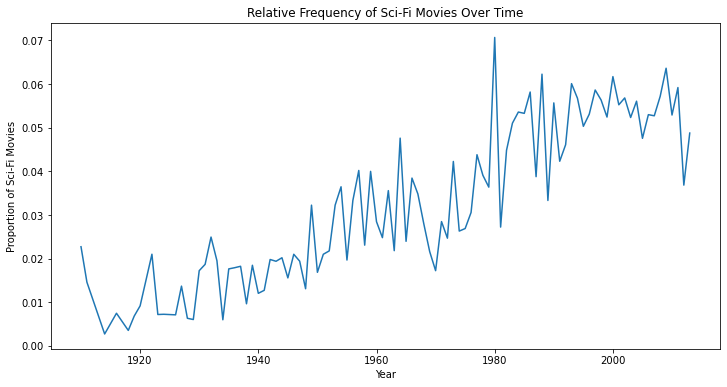

In [106]:
# Merge movie and plot summaries dataframes on 'wikipedia_movie_id'
Stat_sci_fi = pd.merge(movie_metadata_df, plot_summaries_df, on='wikipedia_movie_id', how='inner')

# Define sci-fi keywords
keywords_sci_fi = ["time machine", "time loop", "paradox", "chronology", "temporal",
                   "alternate history", "multiverse", "timeline", "temporal rift",
                   "future", "dimension", "butterfly effect", "time warp",
                   "time jump", "deja vu", "chrononaut", "temporal anomaly", "time dilation",
                   "wormhole", "continuum", "chrono", "alien", "extraterrestrial", "UFO", 
                   "alien encounter", "first contact", "xenomorph", "outer space", "spacecraft", 
                   "life form", "Martian", "alien invasion", "cosmic entity", "otherworldly", 
                   "galactic", "alien planet", "alien species", "alien artifact", 
                   "space colony", "extraterrestrial life", "intergalactic"]

# Identify sci-fi related movies
Stat_sci_fi['sci_fi_related'] = Stat_sci_fi['plot_summary'].apply(
    lambda summary: any(keyword.lower() in summary.lower() for keyword in keywords_sci_fi)
)

# Filter to only sci-fi related movies
Sci_fi_genres = Stat_sci_fi[Stat_sci_fi['sci_fi_related']].copy()
Sci_fi_genres['release_date'] = pd.to_datetime(Sci_fi_genres['release_date'], errors='coerce').dt.year

# Total movie count per year
year_occurrences = movie_metadata_df['release_date'].dt.year.value_counts().sort_index().reset_index(name='movie_count')
year_occurrences.rename(columns={'index': 'release_year'}, inplace=True)

# Sci-fi movie count per year
Number_of_Sci_fi = Sci_fi_genres.groupby('release_date').size().reset_index(name='Sci_fi_count')
Number_of_Sci_fi.rename(columns={'release_date': 'release_year'}, inplace=True)

# Merge total and sci-fi movie counts
merged = pd.merge(Number_of_Sci_fi, year_occurrences, left_on='release_year', right_on='release_year', how='inner')
merged['relative'] = merged['Sci_fi_count'] / merged['movie_count']

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_year', y='relative', data=merged)
plt.title('Relative Frequency of Sci-Fi Movies Over Time')
plt.xlabel('Year')
plt.ylabel('Proportion of Sci-Fi Movies')
plt.show()



Check genre trends across time 

In [115]:
genres = [
    "Action",
    "Adventure",
    "Comedy",
    "Drama",
    "Horror",
    "Science Fiction",
    "Fantasy",
    "Thriller",
    "Mystery",
    "Romance",
    "Animation",
    "Documentary",
    "Biographical",
    "Crime",
    "War",
    "Western",
    "Musical",
    "Historical",
    "Family",
    "Sports",
    "Film Noir",
    "Erotic",
    "Disaster",
    "Psychological",
    "Romantic Comedy",
    "Experimental"
]

# 1. Use list comprehension to flatten all genres in a single list
all_genres = [genre for sublist in movie_metadata_df['genres'] for genre in sublist]

# 2. Convert to a set to get unique genres, then back to a sorted list for readability
unique_genres = sorted(set(all_genres))

# 3. Display the unique genres
print(unique_genres)


['Absurdism', 'Acid western', 'Action', 'Action Comedy', 'Action Thrillers', 'Action/Adventure', 'Addiction Drama', 'Adult', 'Adventure', 'Adventure Comedy', 'Airplanes and airports', 'Albino bias', 'Alien Film', 'Alien invasion', 'Americana', 'Animal Picture', 'Animals', 'Animated Musical', 'Animated cartoon', 'Animation', 'Anime', 'Anthology', 'Anthropology', 'Anti-war', 'Anti-war film', 'Apocalyptic and post-apocalyptic fiction', 'Archaeology', 'Archives and records', 'Art film', 'Auto racing', 'Avant-garde', 'B-Western', 'B-movie', 'Backstage Musical', 'Baseball', 'Beach Film', 'Beach Party film', 'Bengali Cinema', 'Biker Film', 'Biographical film', 'Biography', 'Biopic [feature]', 'Black comedy', 'Black-and-white', 'Blaxploitation', 'Bloopers & Candid Camera', 'Bollywood', 'Boxing', 'Breakdance', 'British Empire Film', 'British New Wave', 'Bruceploitation', 'Buddy Picture', 'Buddy cop', 'Buddy film', 'Business', 'C-Movie', 'Camp', 'Caper story', 'Cavalry Film', 'Chase Movie', 'Chi

In [139]:
Sup_genres = {
    "Action": [
        'Action', 'Action Comedy', 'Action Thrillers', 'Action/Adventure', 'Martial Arts Film', 
        'Auto racing', 'Swashbuckler films', 'Sword and sorcery films', 
        'Biker Film', 'Heist', 'Gangster Film', 'Chase Movie', 'Crime Drama','Movies About Gladiators','Ninja movie','Race movie'
    ],
    "Adventure": [
        'Adventure', 'Action/Adventure', 'Costume Adventure', 'Fantasy Adventure', 
        'Adventure Comedy', 'Fantasy', 'Science fiction Western', 'Space opera', 
        'Space western', 'Samurai cinema', 'Swashbuckler films', 'Sword and Sandal', 
        'Jungle Film', 'Epic', 'Fantasy Drama','Historical Epic'
    ],
    "Comedy": [
        'Comedy', 'Comedy Thriller', 'Comedy Western', 'Comedy film', 'Comedy horror', 
        'Comedy of Errors', 'Comedy of manners', 'Comedy-drama', 'Romantic comedy', 
        'Black comedy', 'Dark Comedy', 'Slapstick', 'Screwball comedy', 'Heavenly Comedy', 
        'Gross-out film', 'Buddy Picture', 'Buddy film', 'Workplace Comedy', 'Stand-up comedy','Bloopers & Candid Camera','Courtroom Comedy','Crime Comedy','Ealing Comedies',
        'Fantasy Comedy','Horror Comedy','Humour'
    ],
    "Drama": [
        'Drama','Absurdism', 'Crime Drama', 'Addiction Drama', 'Childhood Drama', 'Family Drama', 
        'Marriage Drama', 'Psychological drama', 'Historical drama', 'Legal drama', 
        'Melodrama', 'Coming of age', 'Inspirational Drama', 'Romantic drama', 'Domestic Comedy','Courtroom Drama','Erotic Drama'
    ],
    "Horror": [
        'Horror', 'Horror Comedy', 'Psychological horror', 'Slasher', 'Zombie Film', 
        'Monster movie', 'Alien invasion', 'Apocalyptic and post-apocalyptic fiction', 
        'Doomsday film', 'Creature Film', 'Gothic Film', 'Haunted House Film', 'Period Horror','Demonic child','Monster'
    ],
    "Science Fiction": [
        'Science Fiction', 'Alien Film', 'Alien invasion', 'Cyberpunk', 'Time travel', 
        'Apocalyptic and post-apocalyptic fiction', 'Dystopia', 'Sci-Fi Horror', 'Sci-Fi Thriller', 
        'Science fiction Western', 'Future noir', 'Space opera', 'Space western', 'Alien encounter','Crime Fiction','Dystopia','Medical fiction'
    ],
    "Fantasy": [
        'Fantasy', 'Fantasy Adventure', 'Fantasy Comedy', 'Fantasy Drama', 'Mythological Fantasy', 
        'Heaven-Can-Wait Fantasies', 'Sword and sorcery', 'Supernatural', 'Sword and Sandal','Fairy tale'
    ],
    "Thriller": [
        'Thriller', 'Psychological thriller', 'Action Thrillers', 'Crime Thriller', 'Political thriller', 
        'Sci-Fi Thriller', 'Erotic thriller', 'Conspiracy fiction', 'Suspense', 'Mystery', 'Crime Drama'
    ],
    "Mystery": [
        'Mystery', 'Crime', 'Detective', 'Detective fiction', 'Film noir', 'Neo-noir', 'Whodunit', 
        'Psychological thriller', 'Conspiracy fiction', 'Courtroom Drama', 'Gangster Film','Crime Comedy'
    ],
    "Romance": [
        'Romance', 'Romantic comedy', 'Romantic drama', 'Romantic fantasy', 'Romantic thriller'
    ],
    "Animation": [
        'Animation', 'Animated Musical', 'Anime', 'Clay animation', 'Computer Animation', 
        'Silhouette animation', 'Stop motion', 'Live action', 'Supermarionation'
    ],
    "Documentary": [
        'Documentary', 'Animal Picture','Docudrama', 'Concert film', 'Rockumentary', 'Political Documetary', 
        'Biographical film', 'Historical Documentaries','Animals','Political Documetary'
    ],
    "Biographical": [
        'Biography', 'Biopic [feature]', 'Hagiography', 'Biographical film', 'Fictional film'
    ],
    "Crime": [
        'Crime', 'Crime Drama', 'Crime Fiction', 'Gangster Film', 'Master Criminal Films', 
        'Detective', 'Buddy cop', 'Buddy film', 'Police procedural'
    ],
    "War": [
        'War', 'War film', 'Anti-war', 'Combat Films', 'Patriotic film', 'Gulf War', 'War effort','Cold War','Foreign legion','Nuclear warfare'
    ],
    "Western": [
        'Acid western','Western', 'B-Western', 'Spaghetti Western', 'Hybrid Western', 'Epic Western', 
        'Science fiction Western', 'Indian Western', 'Space western', 'Revisionist Western'
    ],
    "Musical": [
        'Musical', 'Animated Musical', 'Backstage Musical', 'Jukebox musical', 
        'Musical Drama', 'Musical comedy', 'Operetta','Anthology','Concert film','Instrumental Music'
    ],
    "Historical": [
        'Historical Epic', 'Historical drama', 'Historical fiction', 'Historical Documentaries', 
        'History', 'Biographical film','British Empire Film','Cavalry Film','Movies About Gladiators','Ninja movie'
    ],
    "Family": [
        'Family', 'Family Film', "Children's", "Children's/Family", 'Family-Oriented Adventure', 
        'Children Entertainment'
    ],
    "Sports": [
        'Sports','Biker Film', 'Boxing', 'Baseball', 'Extreme Sports', 'Auto racing', 'Horse racing','Breakdance','Dance','Health & Fitness','Hip hop movies','Outlaw biker film'
    ],
    "Film Noir": [
        'Film noir', 'Neo-noir', 'Future noir', 'Detective fiction', 'Gangster Film'
    ],
    "Erotic": [
        'Erotic Drama', 'Erotic thriller', 'Erotica', 'Sex comedy', 'Softcore Porn', 
        'Hardcore pornography','Gay pornography','Homoeroticism','Pornographic movie','Pornography'
    ],
    "Disaster": [
        'Disaster', 'Doomsday film', 'Natural disaster', 'Disaster film', 'Monster movie','Apocalyptic and post-apocalyptic fiction','Nuclear warfare','Plague'
    ],
    "Psychological": [
        'Psychological horror', 'Psychological thriller', 'Psycho-biddy', 'Existentialism'
    ],
    "Romantic Comedy": [
        'Romantic comedy', 'Heavenly Comedy', 'Romantic fantasy'
    ],
    "Experimental": [
        'Avant-garde', 'Art film', 'Experimental film', 'Mondo film', 'Existentialism','Anthropology','Mumblecore'
    ],
    "Propaganda": [
        'Propaganda film'
    ]
}   


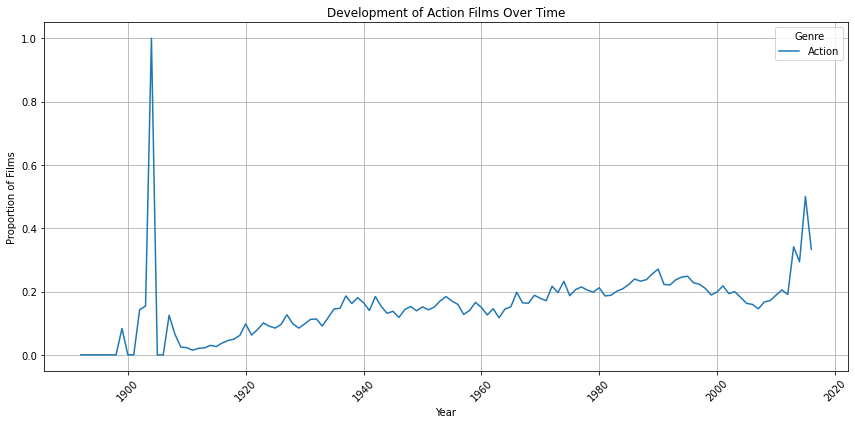

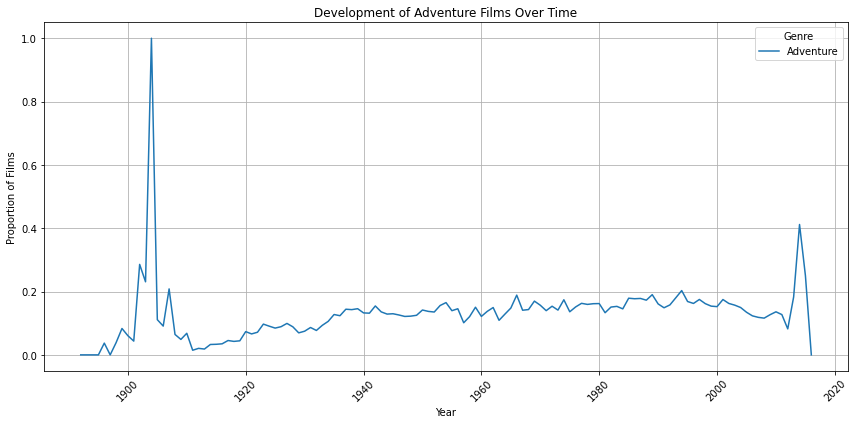

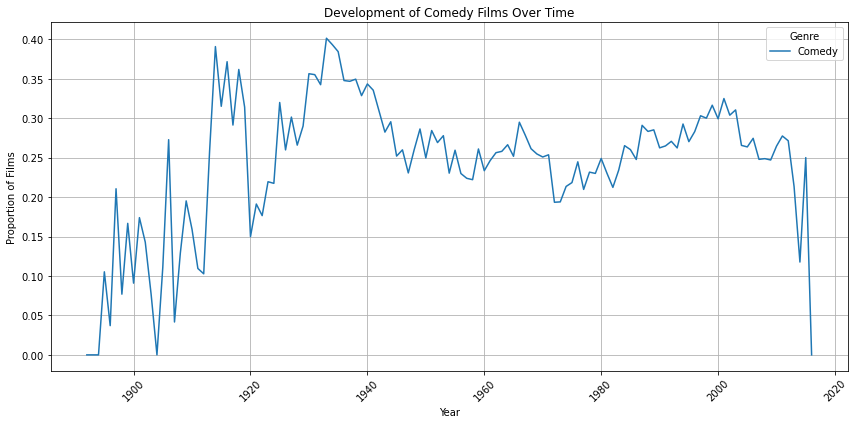

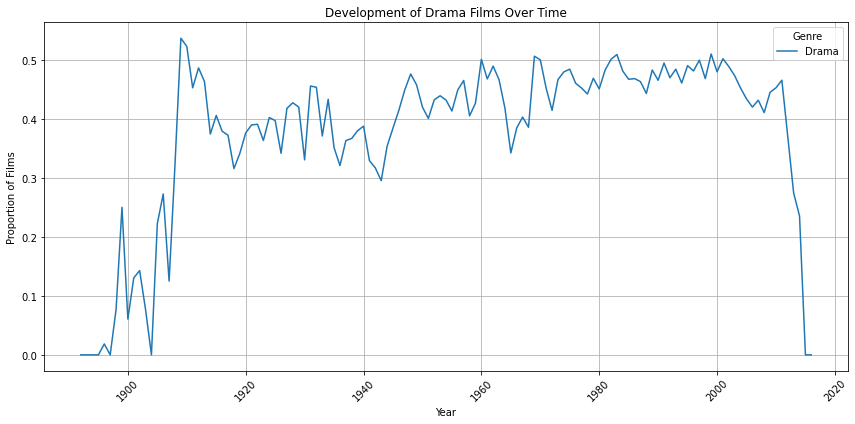

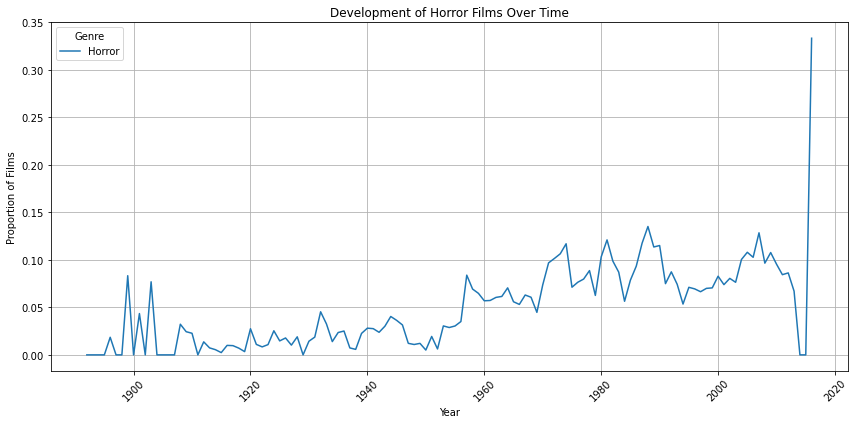

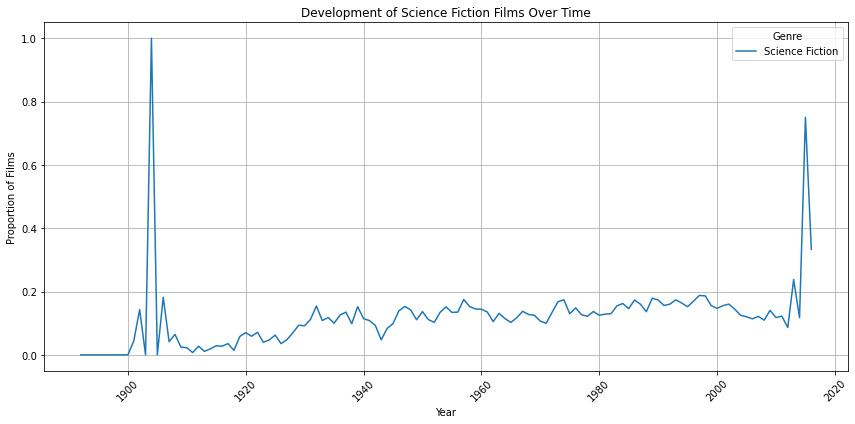

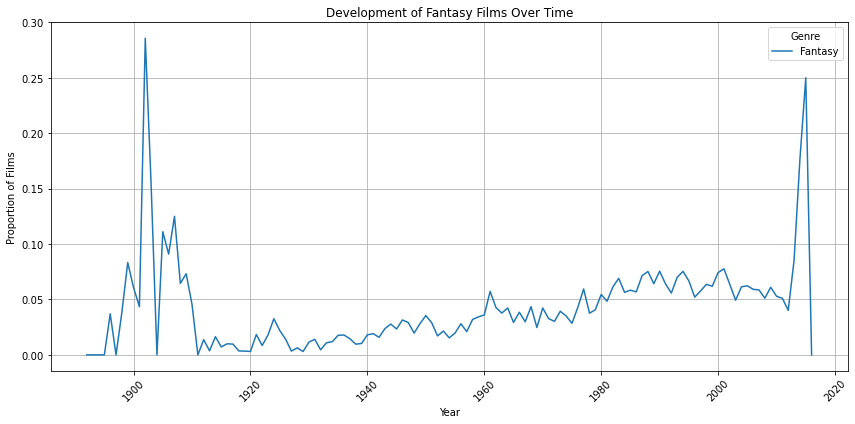

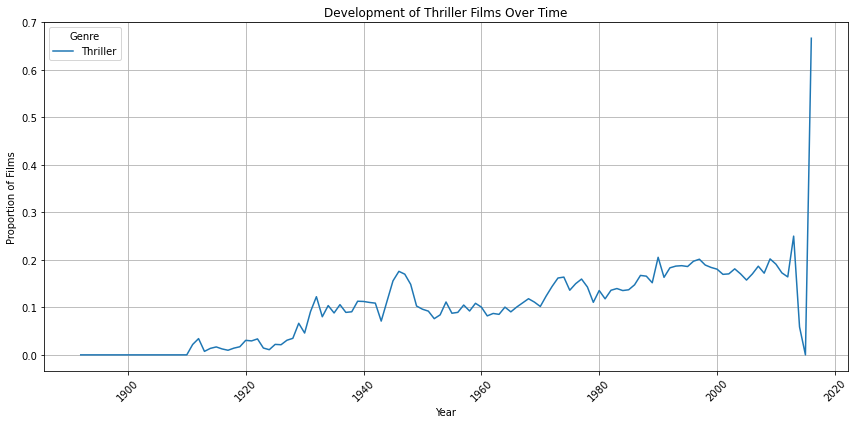

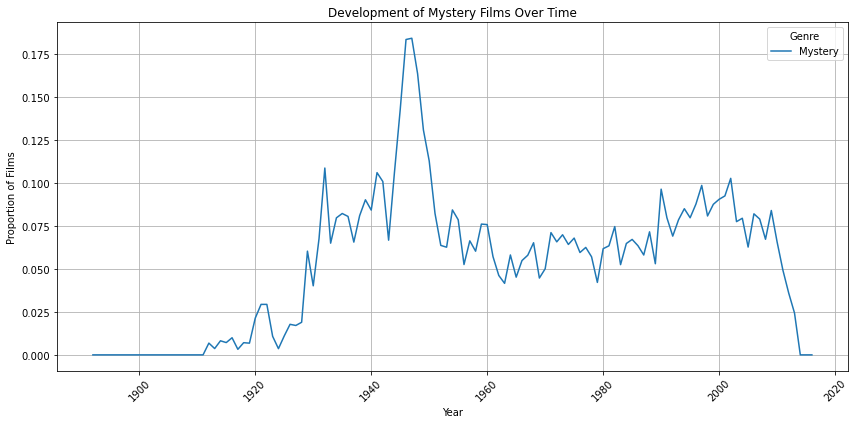

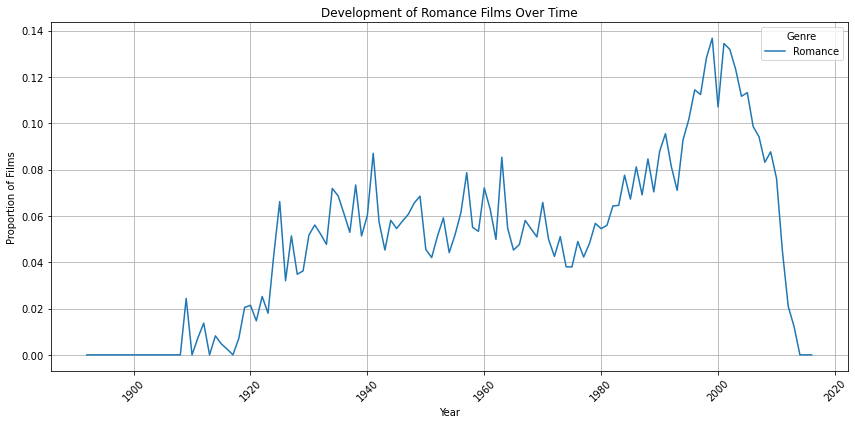

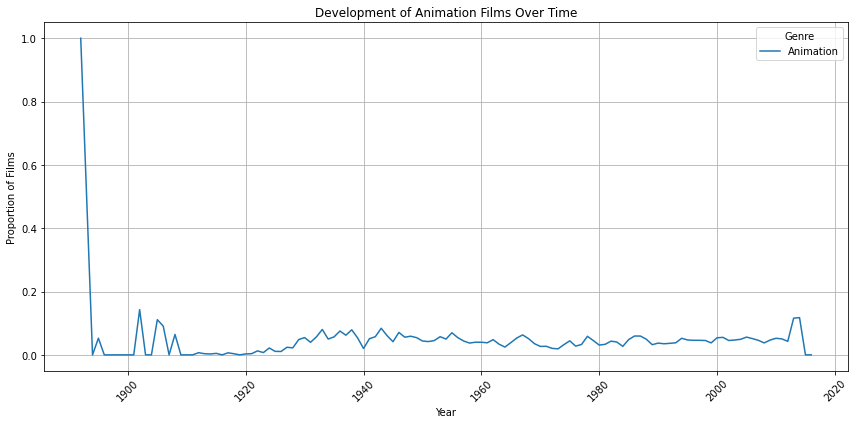

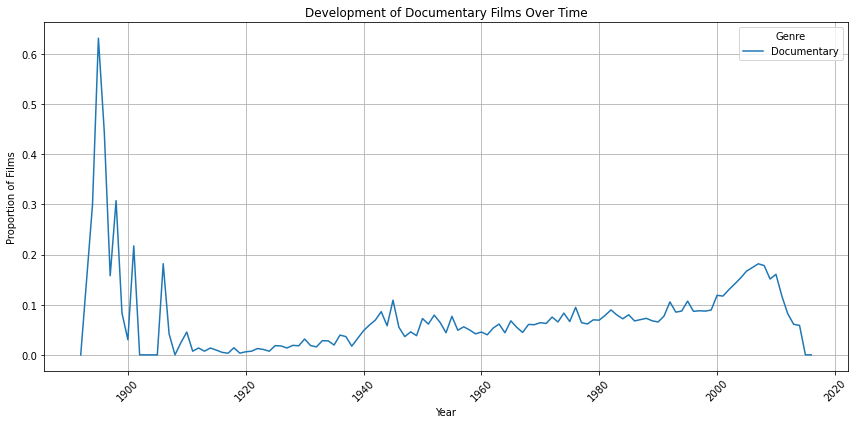

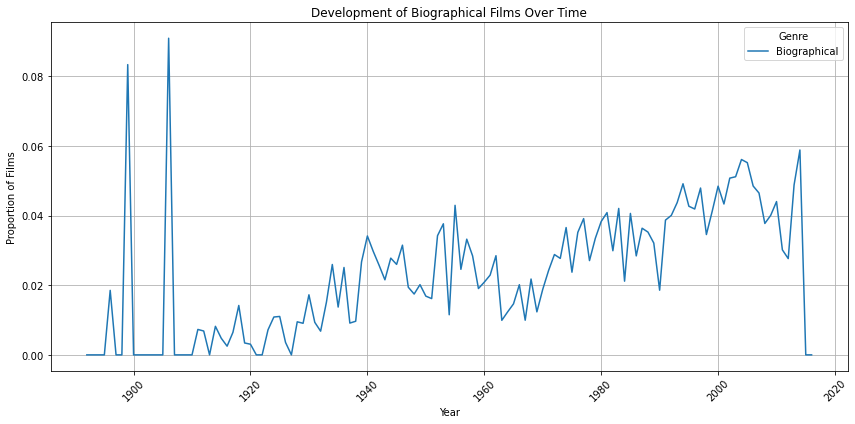

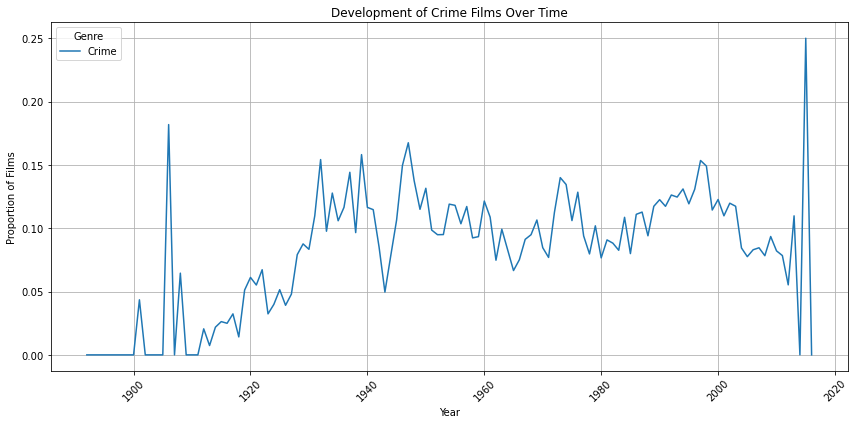

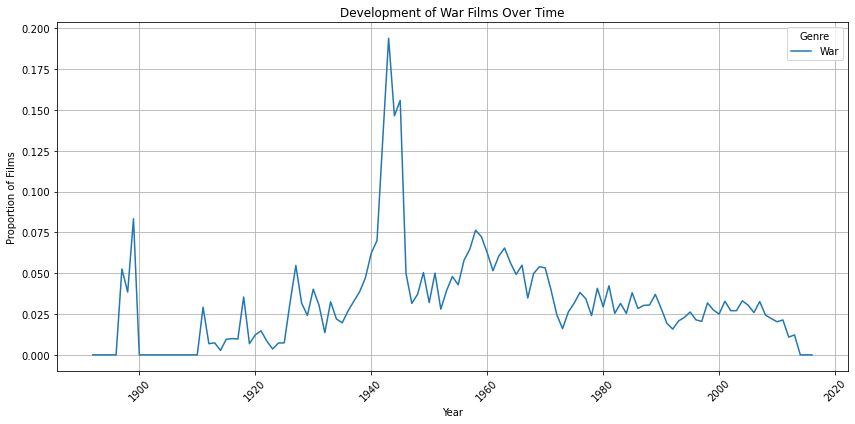

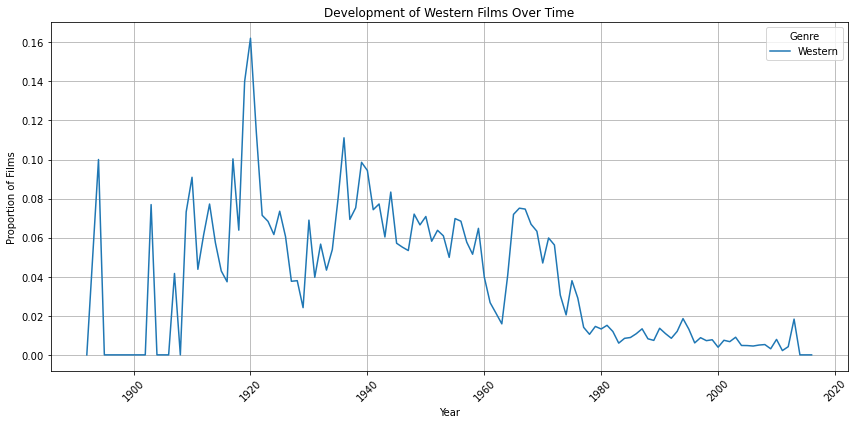

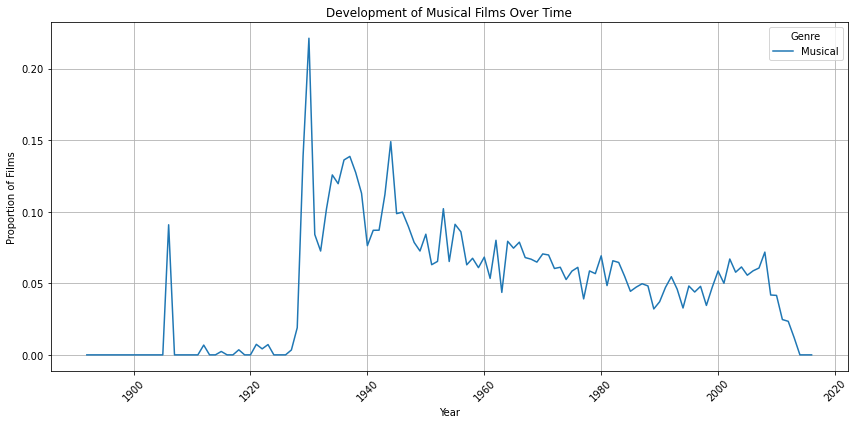

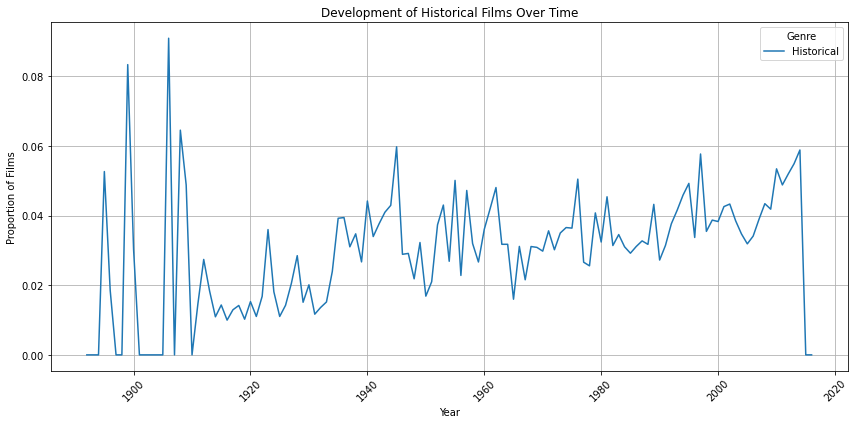

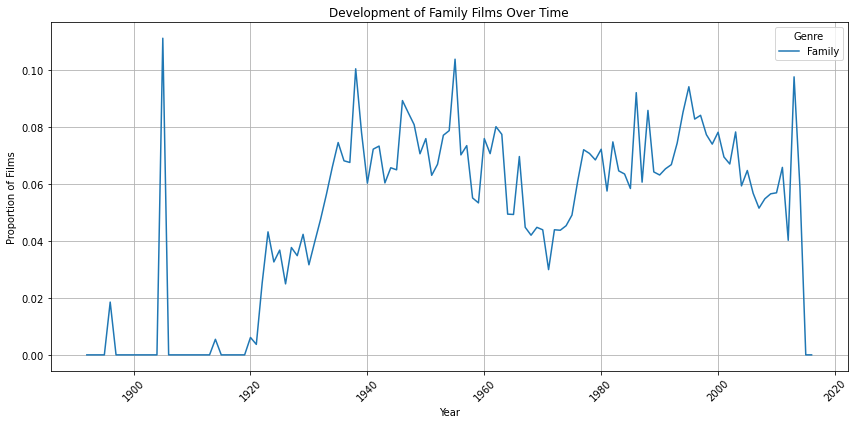

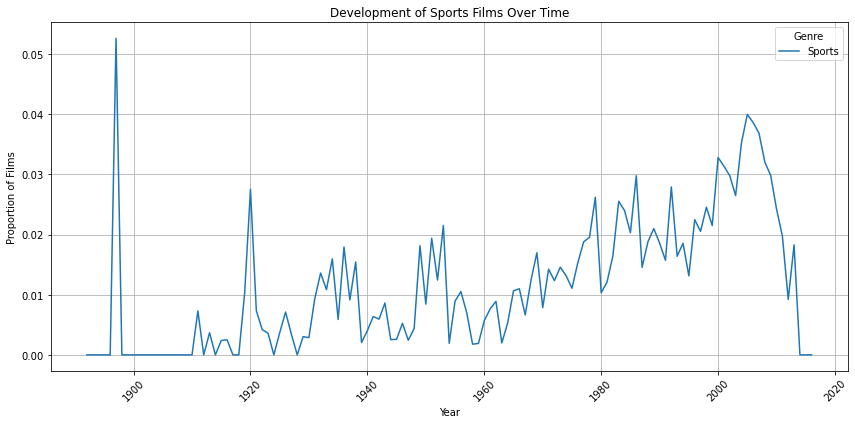

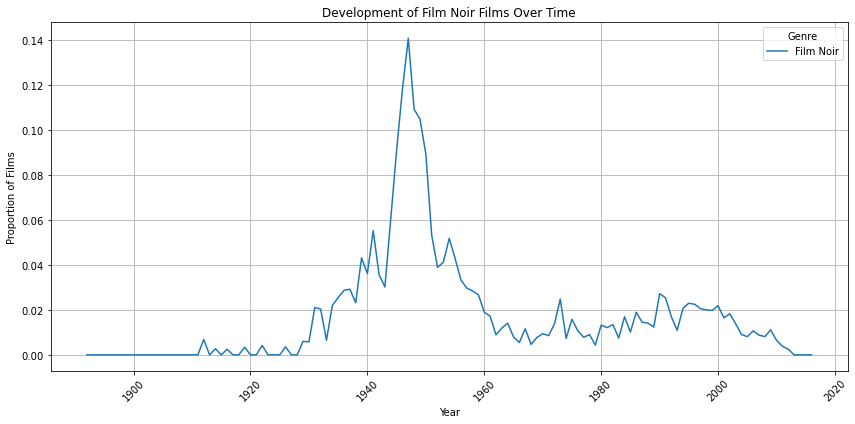

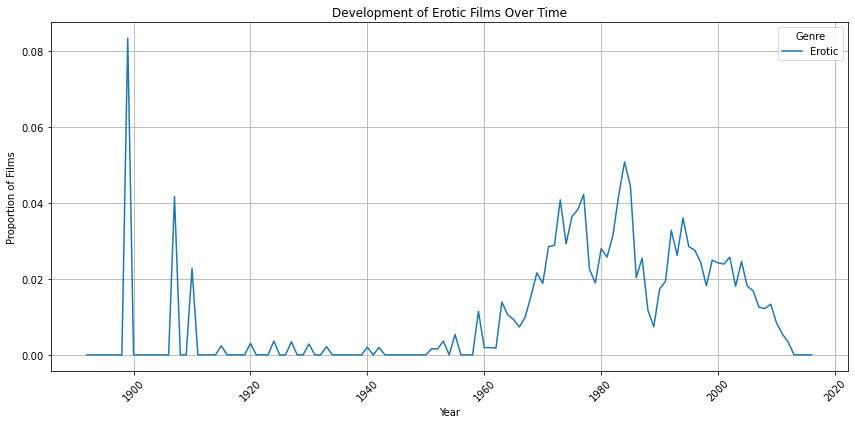

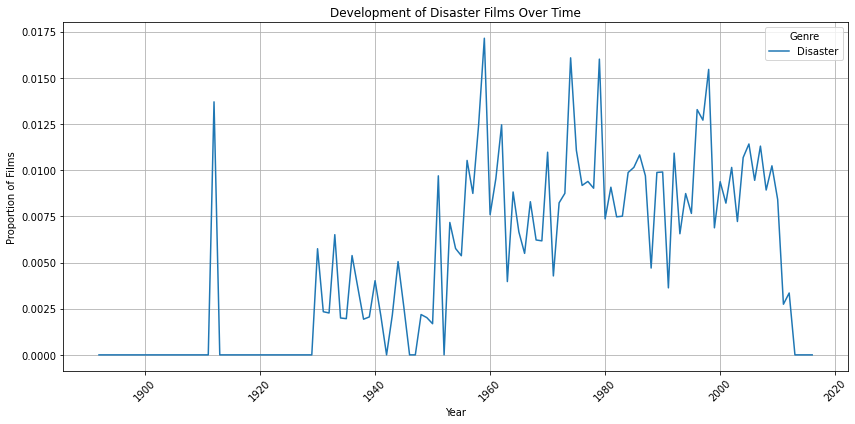

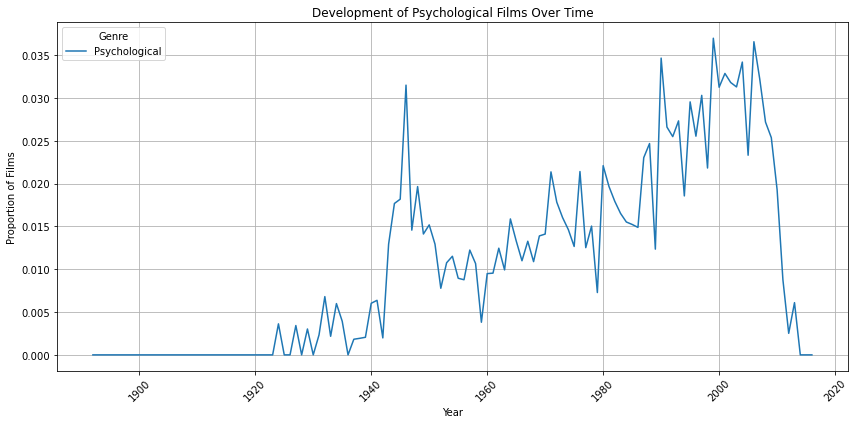

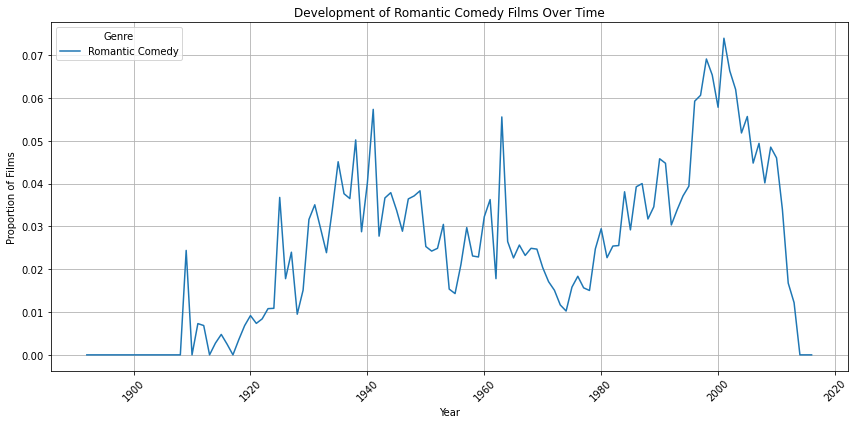

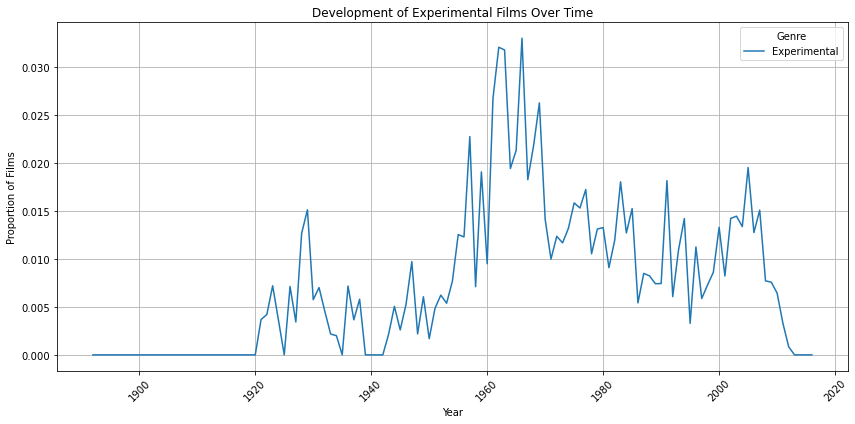

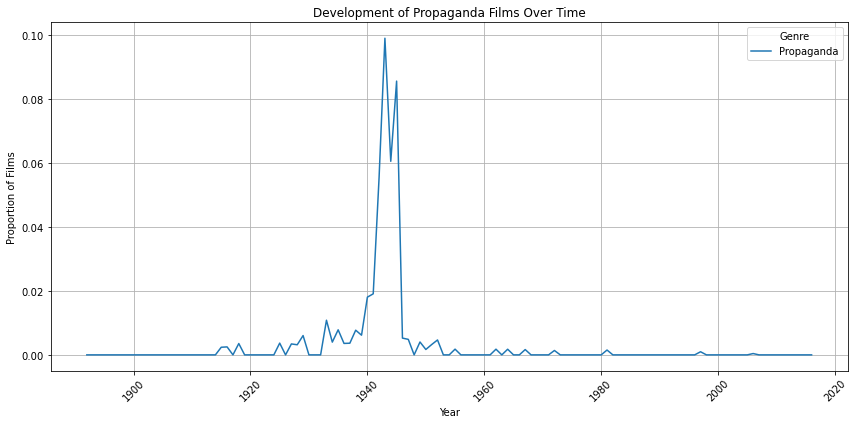

In [143]:


def count_films_per_year_by_genre(movie_metadata_df, sup_genres):
    genre_counts = {}

    # Convert 'release_date' to datetime and extract the year
    movie_metadata_df['release_date'] = pd.to_datetime(movie_metadata_df['release_date'], errors='coerce')
    movie_metadata_df['release_year'] = movie_metadata_df['release_date'].dt.year

    # Iterate over each main genre in sup_genres
    for main_genre, sub_genres in sup_genres.items():
        # Filter for movies that contain any of the sub-genres for the current main genre
        genre_movies = movie_metadata_df[
            movie_metadata_df['genres'].apply(
                lambda genres_list: any(sub_genre in genres_list for sub_genre in sub_genres) 
                if isinstance(genres_list, list) else False
            )
        ]
        
        # Count the number of films per year for the current genre
        films_per_year = genre_movies['release_year'].value_counts().sort_index()
        
        # Store the result in genre_counts with main_genre as the key
        genre_counts[main_genre] = films_per_year

    return genre_counts


# Call the function
result = count_films_per_year_by_genre(movie_metadata_df, Sup_genres)

# Convert the results dictionary to a DataFrame
result_df = pd.DataFrame(result).fillna(0)
result_df.index.name = 'release_year'
result_df.reset_index(inplace=True)

# Ensure the yearly movie count data is available in 'year_occurrences'
result_df_merged = pd.merge(result_df, year_occurrences, on='release_year')

# Create a plot for each sub-genre
for genre in Sup_genres:
    plt.figure(figsize=(12, 6))

    # Plot the proportion of the genre out of total movie count for each year
    sns.lineplot(
        x=result_df_merged['release_year'],
        y=result_df_merged[genre] / result_df_merged['movie_count'],
        label=genre
    )

    plt.title(f'Development of {genre} Films Over Time')
    plt.xlabel('Year')
    plt.ylabel('Proportion of Films')
    plt.xticks(rotation=45)
    plt.legend(title='Genre')
    plt.grid()
    plt.tight_layout()
    plt.show()



    

In [ ]:
def count_films_per_year_by_genre(movie_metadata_df, sup_genres):
    genre_counts = {}

    # Convert 'release_date' to datetime and extract the year
    movie_metadata_df['release_date'] = pd.to_datetime(movie_metadata_df['release_date'], errors='coerce')
    movie_metadata_df['release_year'] = movie_metadata_df['release_date'].dt.year
    

    return genre_counts

In [142]:

    
for main_genre, sub_genres in Sup_genres.items():
    movie_metadata_df[main_genre] = movie_metadata_df['genres'].apply(
        lambda genres_list: any(sub_genre in genres_list for sub_genre in sub_genres)
    )